# Import modules¶

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import math

import sklearn.linear_model 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN

import warnings
warnings.filterwarnings('ignore')

# Loading the dataset

In [5]:
house_data = pd.read_csv("data.csv")

In [6]:
data = pd.DataFrame(house_data)
data

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,3.130000e+05,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2.384000e+06,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,3.420000e+05,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,4.200000e+05,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,5.500000e+05,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,2014-07-09 00:00:00,3.081667e+05,3.0,1.75,1510,6360,1.0,0,0,4,1510,0,1954,1979,501 N 143rd St,Seattle,WA 98133,USA
4596,2014-07-09 00:00:00,5.343333e+05,3.0,2.50,1460,7573,2.0,0,0,3,1460,0,1983,2009,14855 SE 10th Pl,Bellevue,WA 98007,USA
4597,2014-07-09 00:00:00,4.169042e+05,3.0,2.50,3010,7014,2.0,0,0,3,3010,0,2009,0,759 Ilwaco Pl NE,Renton,WA 98059,USA
4598,2014-07-10 00:00:00,2.034000e+05,4.0,2.00,2090,6630,1.0,0,0,3,1070,1020,1974,0,5148 S Creston St,Seattle,WA 98178,USA


In [7]:
data.shape

(4600, 18)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

In [9]:
data['price']     = data['price'].astype('int64')
data['bedrooms']  = data['bedrooms'].astype('int64')
data['bathrooms'] = data['bathrooms'].astype('int64')
data['floors']    = data['floors'].astype('int64')
data['street']    = data['street'].astype('string')
data['city']      = data['city'].astype('string')
data['statezip']  = data['statezip'].astype('string')
data['country']   = data['country'].astype('string')

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   date           4600 non-null   object
 1   price          4600 non-null   int64 
 2   bedrooms       4600 non-null   int64 
 3   bathrooms      4600 non-null   int64 
 4   sqft_living    4600 non-null   int64 
 5   sqft_lot       4600 non-null   int64 
 6   floors         4600 non-null   int64 
 7   waterfront     4600 non-null   int64 
 8   view           4600 non-null   int64 
 9   condition      4600 non-null   int64 
 10  sqft_above     4600 non-null   int64 
 11  sqft_basement  4600 non-null   int64 
 12  yr_built       4600 non-null   int64 
 13  yr_renovated   4600 non-null   int64 
 14  street         4600 non-null   string
 15  city           4600 non-null   string
 16  statezip       4600 non-null   string
 17  country        4600 non-null   string
dtypes: int64(13), object(1), str

In [11]:
data.drop_duplicates()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000,3,1,1340,7912,1,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000,5,2,3650,9050,2,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000,3,2,1930,11947,1,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000,3,2,2000,8030,1,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000,4,2,1940,10500,1,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,2014-07-09 00:00:00,308166,3,1,1510,6360,1,0,0,4,1510,0,1954,1979,501 N 143rd St,Seattle,WA 98133,USA
4596,2014-07-09 00:00:00,534333,3,2,1460,7573,2,0,0,3,1460,0,1983,2009,14855 SE 10th Pl,Bellevue,WA 98007,USA
4597,2014-07-09 00:00:00,416904,3,2,3010,7014,2,0,0,3,3010,0,2009,0,759 Ilwaco Pl NE,Renton,WA 98059,USA
4598,2014-07-10 00:00:00,203400,4,2,2090,6630,1,0,0,3,1070,1020,1974,0,5148 S Creston St,Seattle,WA 98178,USA


In [12]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
price,4600.0,551962.975435,563834.706028,0.0,322875.00,460943.0,654962.50,26590000.0
bedrooms,4600.0,3.400870,0.908848,0.0,3.00,3.0,4.00,9.0
bathrooms,4600.0,1.788913,0.752185,0.0,1.00,2.0,2.00,8.0
sqft_living,4600.0,2139.346957,963.206916,370.0,1460.00,1980.0,2620.00,13540.0
sqft_lot,4600.0,14852.516087,35884.436145,638.0,5000.75,7683.0,11001.25,1074218.0
floors,4600.0,1.459130,0.552194,1.0,1.00,1.0,2.00,3.0
waterfront,4600.0,0.007174,0.084404,0.0,0.00,0.0,0.00,1.0
view,4600.0,0.240652,0.778405,0.0,0.00,0.0,0.00,4.0
condition,4600.0,3.451739,0.677230,1.0,3.00,3.0,4.00,5.0
sqft_above,4600.0,1827.265435,862.168977,370.0,1190.00,1590.0,2300.00,9410.0


In [13]:
(data.price == 0).sum()

49

In [14]:
data['price'].replace(0, np.nan, inplace = True)

In [15]:
data.isnull().sum()

date              0
price            49
bedrooms          0
bathrooms         0
sqft_living       0
sqft_lot          0
floors            0
waterfront        0
view              0
condition         0
sqft_above        0
sqft_basement     0
yr_built          0
yr_renovated      0
street            0
city              0
statezip          0
country           0
dtype: int64

In [16]:
data.dropna(inplace=True)
(data.price == 0).sum()

0

In [17]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
price,4551.0,557905.885959,563929.874935,7800.0,326264.0,465000.0,657500.0,26590000.0
bedrooms,4551.0,3.394639,0.904595,0.0,3.0,3.0,4.0,9.0
bathrooms,4551.0,1.782905,0.744431,0.0,1.0,2.0,2.0,8.0
sqft_living,4551.0,2132.372226,955.949708,370.0,1460.0,1970.0,2610.0,13540.0
sqft_lot,4551.0,14835.280598,35964.077825,638.0,5000.0,7680.0,10978.0,1074218.0
floors,4551.0,1.459240,0.552355,1.0,1.0,1.0,2.0,3.0
waterfront,4551.0,0.006592,0.080932,0.0,0.0,0.0,0.0,1.0
view,4551.0,0.234674,0.765373,0.0,0.0,0.0,0.0,4.0
condition,4551.0,3.449352,0.675160,1.0,3.0,3.0,4.0,5.0
sqft_above,4551.0,1822.221710,854.452888,370.0,1190.0,1590.0,2300.0,9410.0


In [18]:
data['date'] = pd.to_datetime(data['date'])
data

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02,313000.0,3,1,1340,7912,1,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02,2384000.0,5,2,3650,9050,2,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02,342000.0,3,2,1930,11947,1,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02,420000.0,3,2,2000,8030,1,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02,550000.0,4,2,1940,10500,1,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,2014-07-09,308166.0,3,1,1510,6360,1,0,0,4,1510,0,1954,1979,501 N 143rd St,Seattle,WA 98133,USA
4596,2014-07-09,534333.0,3,2,1460,7573,2,0,0,3,1460,0,1983,2009,14855 SE 10th Pl,Bellevue,WA 98007,USA
4597,2014-07-09,416904.0,3,2,3010,7014,2,0,0,3,3010,0,2009,0,759 Ilwaco Pl NE,Renton,WA 98059,USA
4598,2014-07-10,203400.0,4,2,2090,6630,1,0,0,3,1070,1020,1974,0,5148 S Creston St,Seattle,WA 98178,USA


In [19]:
data.insert(1, "year", data.date.dt.year)
data.head()

,date,year,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02,2014,313000.0,3,1,1340,7912,1,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02,2014,2384000.0,5,2,3650,9050,2,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02,2014,342000.0,3,2,1930,11947,1,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02,2014,420000.0,3,2,2000,8030,1,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02,2014,550000.0,4,2,1940,10500,1,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [20]:
data.nunique(axis = 0)  

date               70
year                1
price            1740
bedrooms           10
bathrooms           8
sqft_living       561
sqft_lot         3087
floors              3
waterfront          2
view                5
condition           5
sqft_above        510
sqft_basement     207
yr_built          115
yr_renovated       59
street           4476
city               44
statezip           77
country             1
dtype: int64

In [21]:
data.corr()

,year,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
price,NaN,1.000000,0.210228,0.331917,0.445494,0.051347,0.138342,0.150083,0.242587,0.038892,0.380661,0.217782,0.021757,-0.029034
bedrooms,NaN,0.210228,1.000000,0.499640,0.596053,0.071138,0.154922,-0.005521,0.115080,0.023018,0.485672,0.335103,0.141498,-0.062219
bathrooms,NaN,0.331917,0.499640,1.000000,0.706352,0.111565,0.466471,0.056590,0.196671,-0.118957,0.645209,0.268266,0.394298,-0.188182
sqft_living,NaN,0.445494,0.596053,0.706352,1.000000,0.213268,0.339348,0.107758,0.309343,-0.062529,0.875657,0.449671,0.284733,-0.121589
sqft_lot,NaN,0.051347,0.071138,0.111565,0.213268,1.000000,-0.005019,0.017408,0.072527,0.000929,0.219193,0.035894,0.049163,-0.021068
floors,NaN,0.138342,0.154922,0.466471,0.339348,-0.005019,1.000000,0.010928,0.022631,-0.305362,0.516264,-0.252654,0.561159,-0.248916
waterfront,NaN,0.150083,-0.005521,0.056590,0.107758,0.017408,0.010928,1.000000,0.347572,0.006112,0.072502,0.088880,-0.032017,0.015821
view,NaN,0.242587,0.115080,0.196671,0.309343,0.072527,0.022631,0.347572,1.000000,0.062560,0.174629,0.317117,-0.066344,0.025846
condition,NaN,0.038892,0.023018,-0.118957,-0.062529,0.000929,-0.305362,0.006112,0.062560,1.000000,-0.176549,0.197144,-0.398886,-0.184483


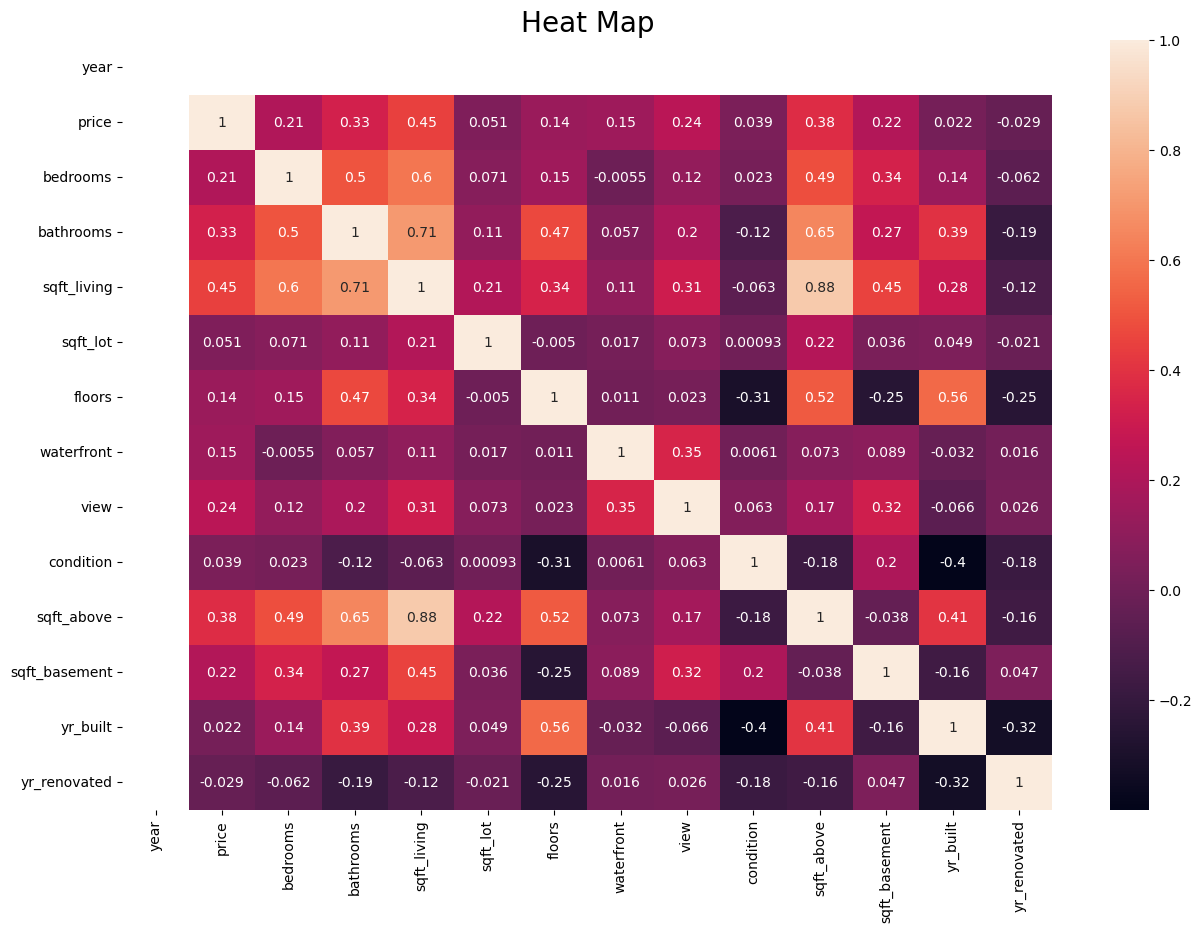

In [22]:
# draw Heat Map 
plt.figure(figsize=(15, 10))
sns.heatmap(data.corr(), annot=True)
plt.title('Heat Map', size=20)
plt.yticks(rotation = 0)
plt.show()

# Data Visualization

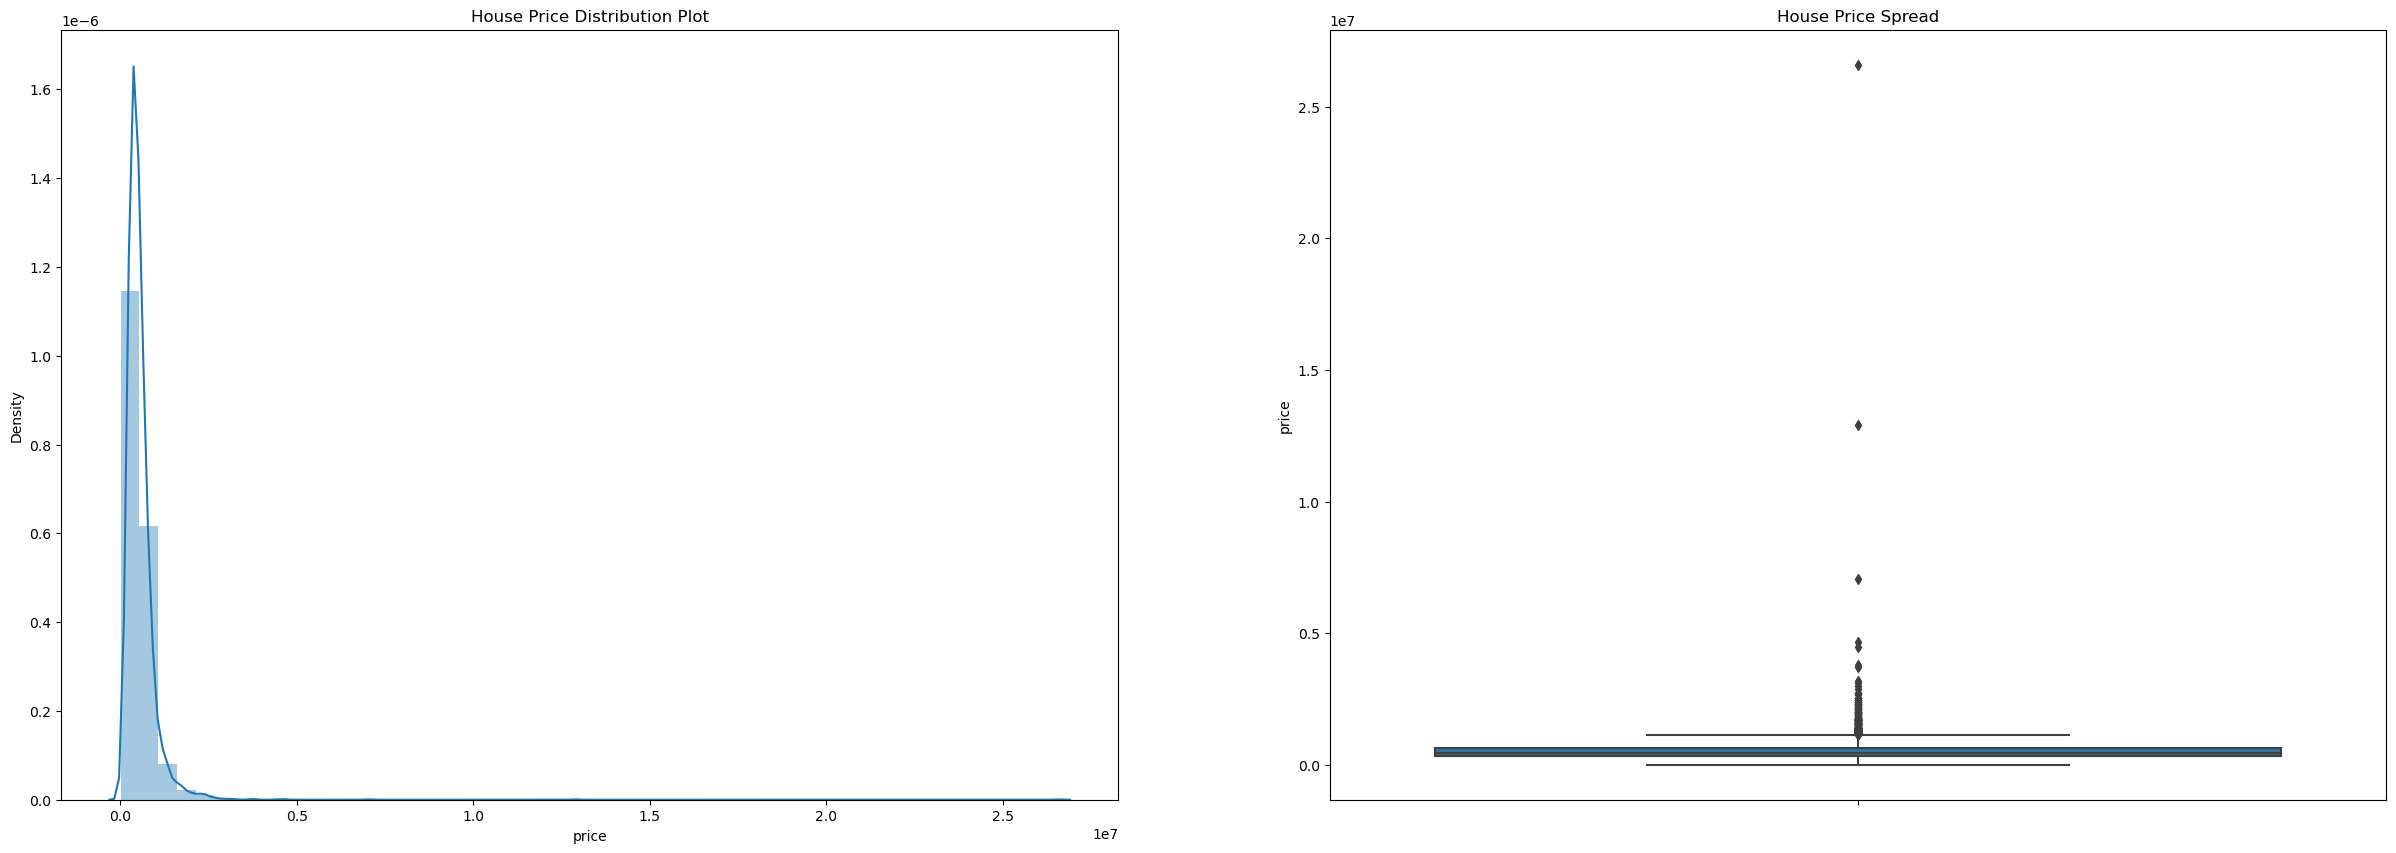

In [23]:
plt.figure(figsize=(30,10))

plt.subplot(1,2,1)
plt.title('House Price Distribution Plot')
sns.distplot(data["price"])

plt.subplot(1,2,2)
plt.title('House Price Spread')
sns.boxplot(y=data["price"])

plt.show()

In [24]:
# make function for count plot and scatter plots for Categorical features

def Categorical_Plot(column,rotation=0):
    
        plt.figure(figsize=(30, 10))
        plt.subplot(1, 2, 1)
        pd.value_counts(data[column]).plot(kind='bar')
        plt.xticks( horizontalalignment="center", fontsize=15, rotation = rotation )
        plt.xlabel(f"\n{str(column)}", fontsize=15)
        plt.ylabel("Count\n", fontsize=15)
        plt.yticks(fontsize = 15)
        plt.title(f"{str(column)} - Count\n", fontsize = 15)

        plt.subplot(1, 2, 2)
        sns.barplot(x = data[column], y = data.price)
        plt.xticks( horizontalalignment="center", fontsize=15, rotation = rotation )
        plt.xlabel(f"\n{str(column)}", fontsize=15)
        plt.yticks(fontsize = 15)
        plt.title(f"{str(column)} - Price\n", fontsize = 15)
        plt.ylabel("Price\n", fontsize=15)

        plt.show()
        print()

In [26]:
# make function for box plots and scatter plots for Numerical features

def Numerical_Plot(column):
    
        plt.figure(figsize=(20, 5))
        plt.subplot(1,2,1)
        plt.grid(color='black', linestyle='-', linewidth=0.25)
        sns.boxplot(data[column])
        plt.xticks( horizontalalignment="center", fontsize=15)
        plt.xlabel(f"\n{str(column)}", fontsize=15)
        plt.yticks(fontsize = 15)
        plt.title(f"\n{str(column)} Box Plot\n", fontsize = 15)

        plt.subplot(1, 2,2)
        plt.grid(color='black', linestyle='-', linewidth=0.25)
        sns.scatterplot(x=data[column],y=data["price"],hue=data[column])
        plt.xticks( horizontalalignment="center", fontsize=15)
        plt.xlabel(f"\n{str(column)}", fontsize=15)
        plt.yticks(fontsize = 15)
        plt.title(f"{str(column)} - Price\n", fontsize = 15)
        plt.ylabel("Price\n", fontsize=15)

        plt.show()
        print()

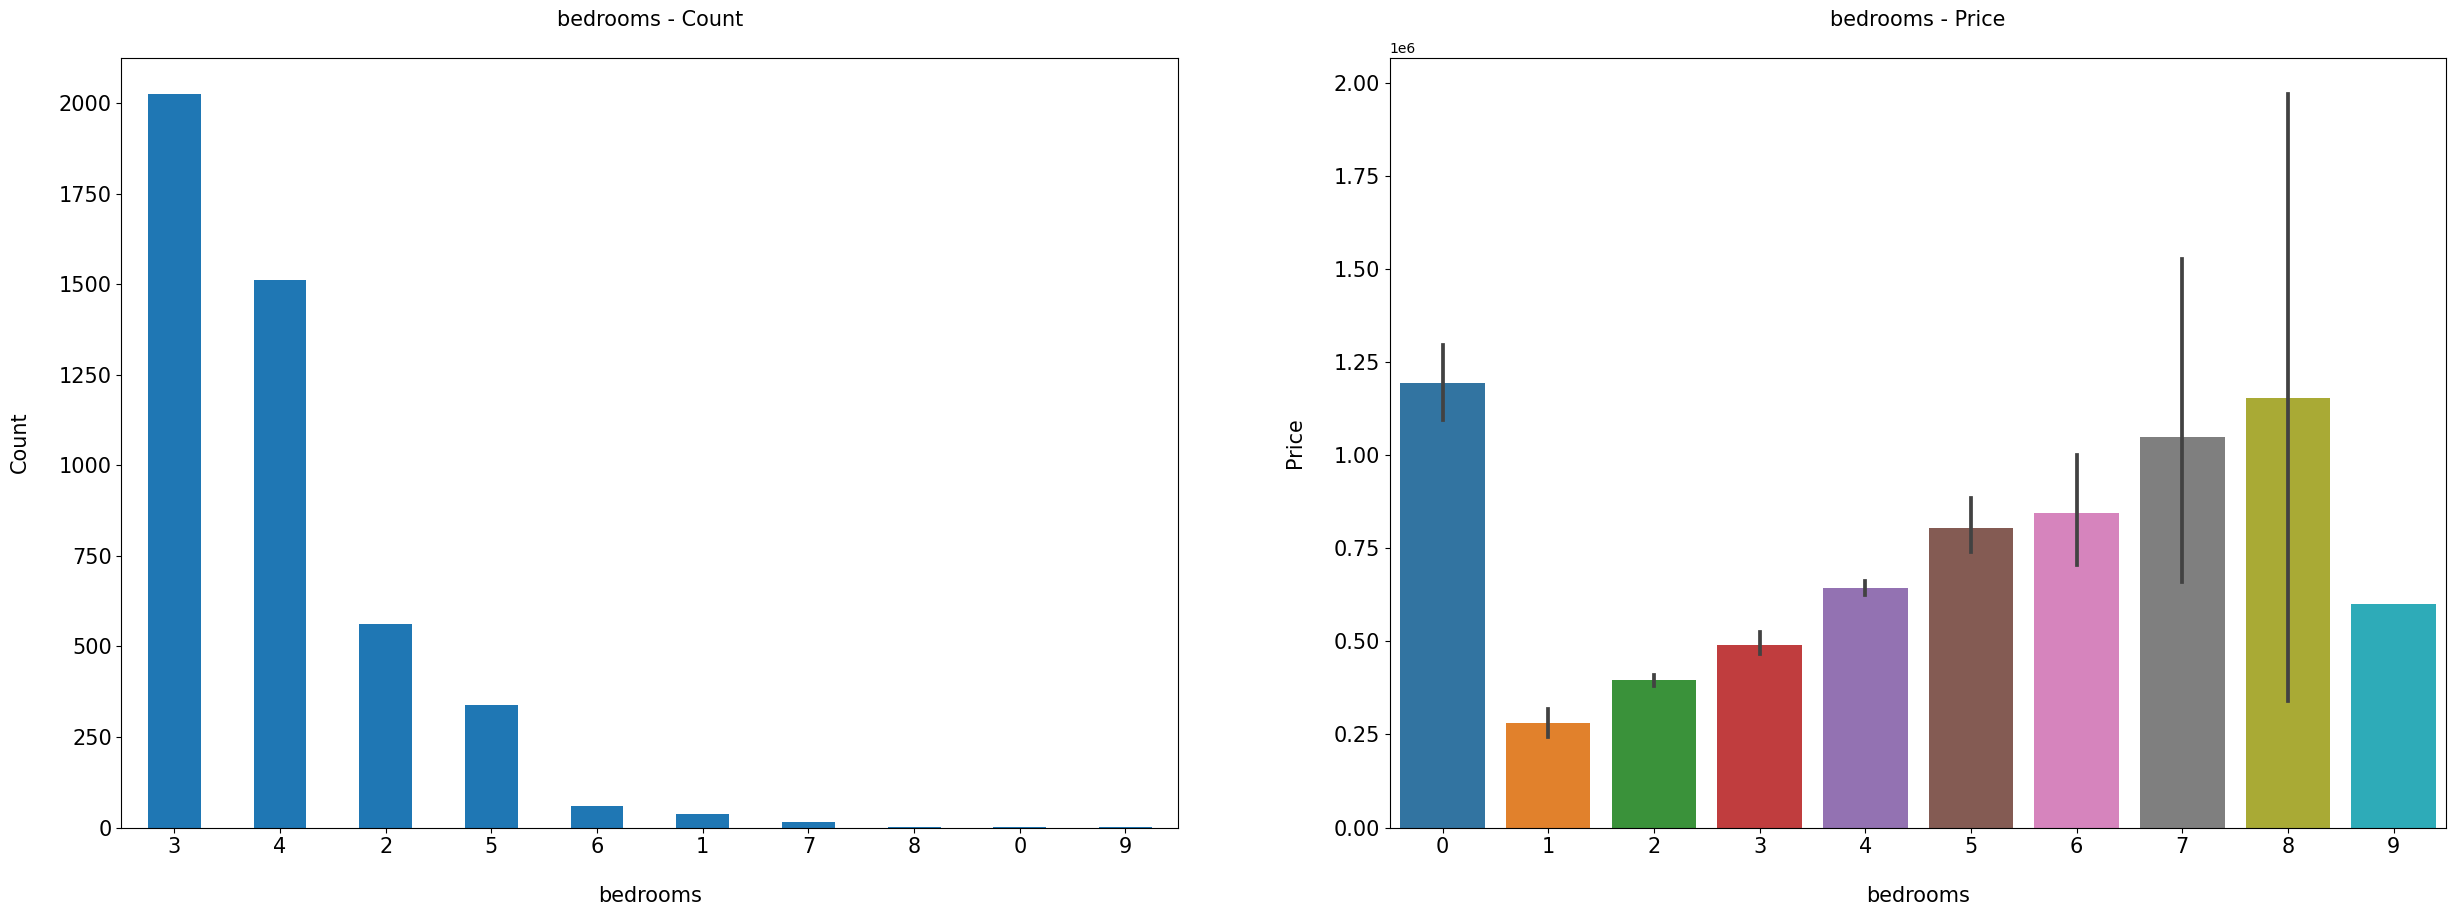

In [27]:
Categorical_Plot("bedrooms")

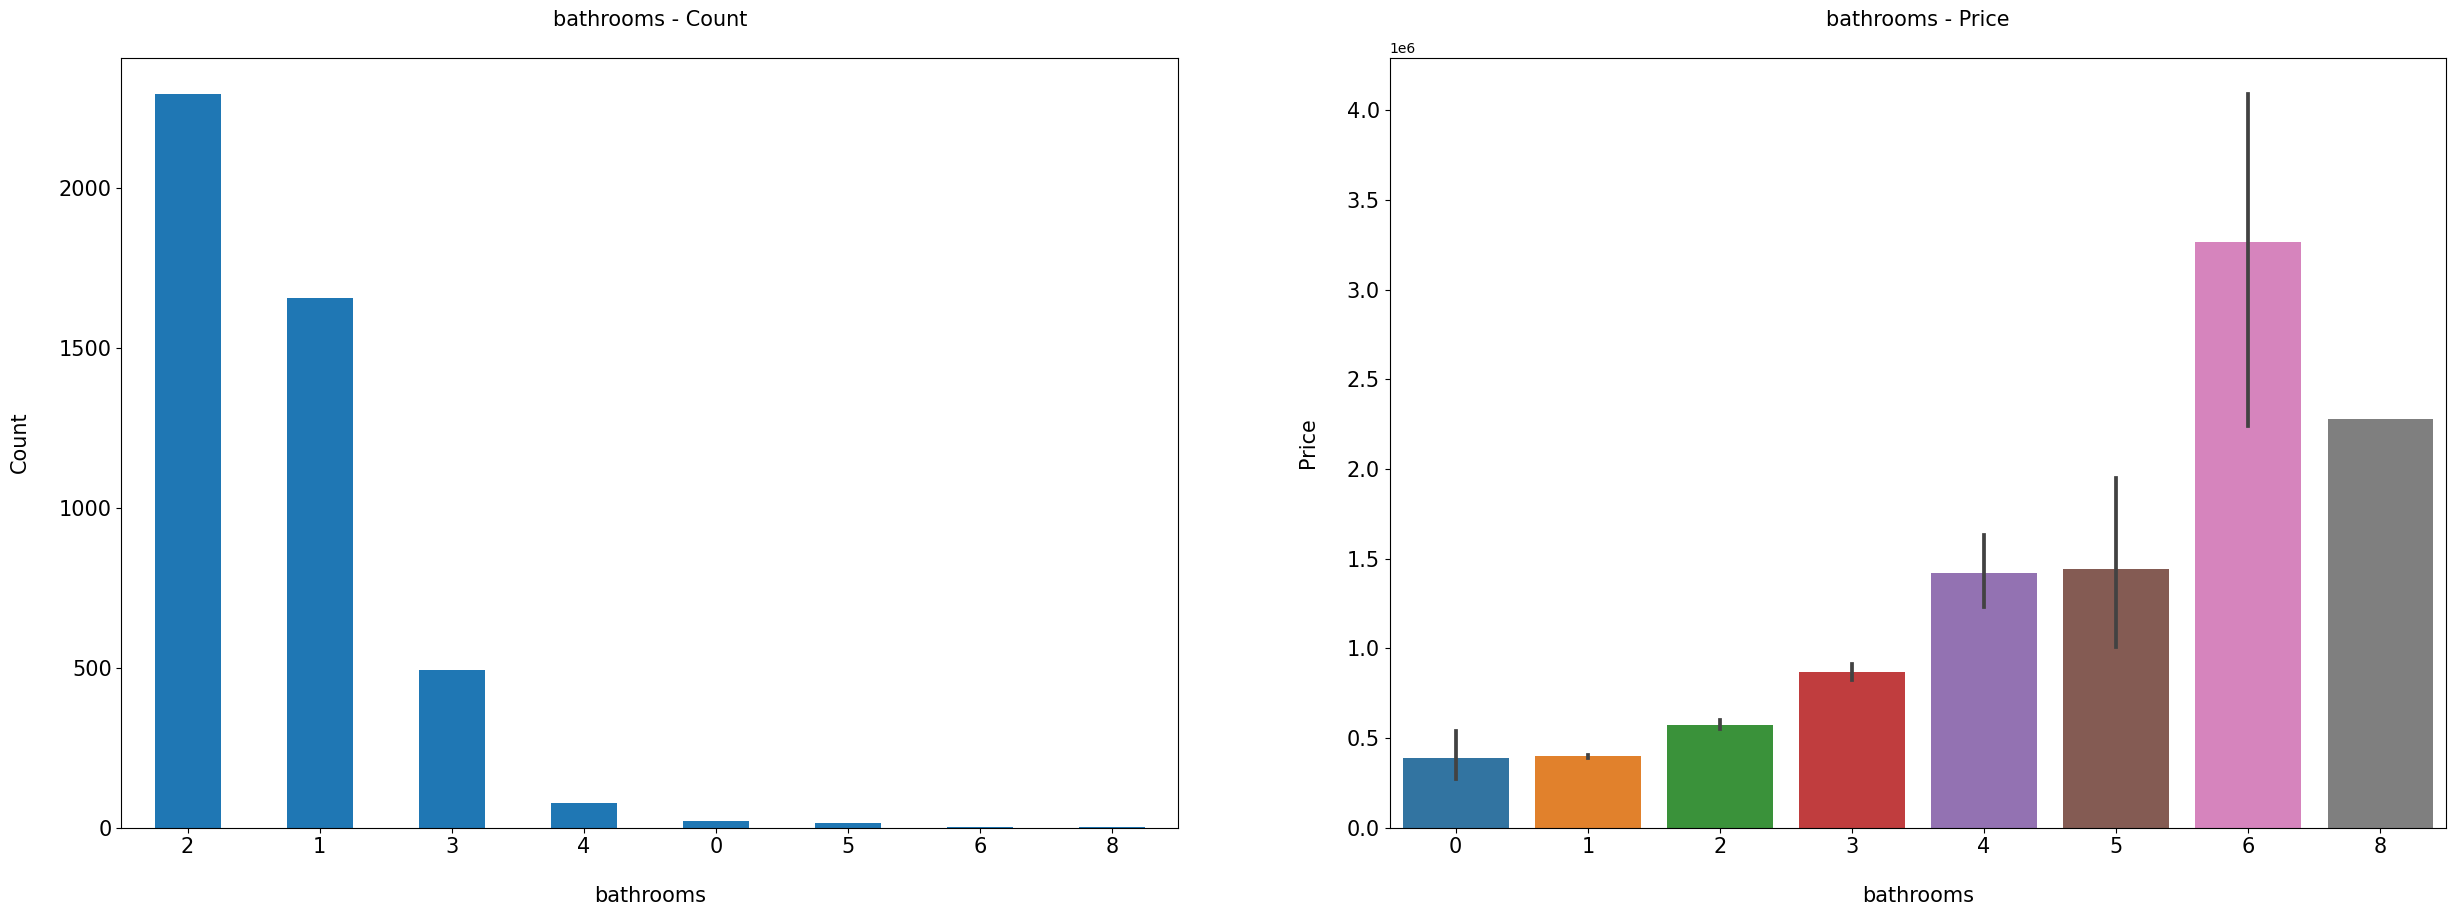

In [28]:
Categorical_Plot("bathrooms")

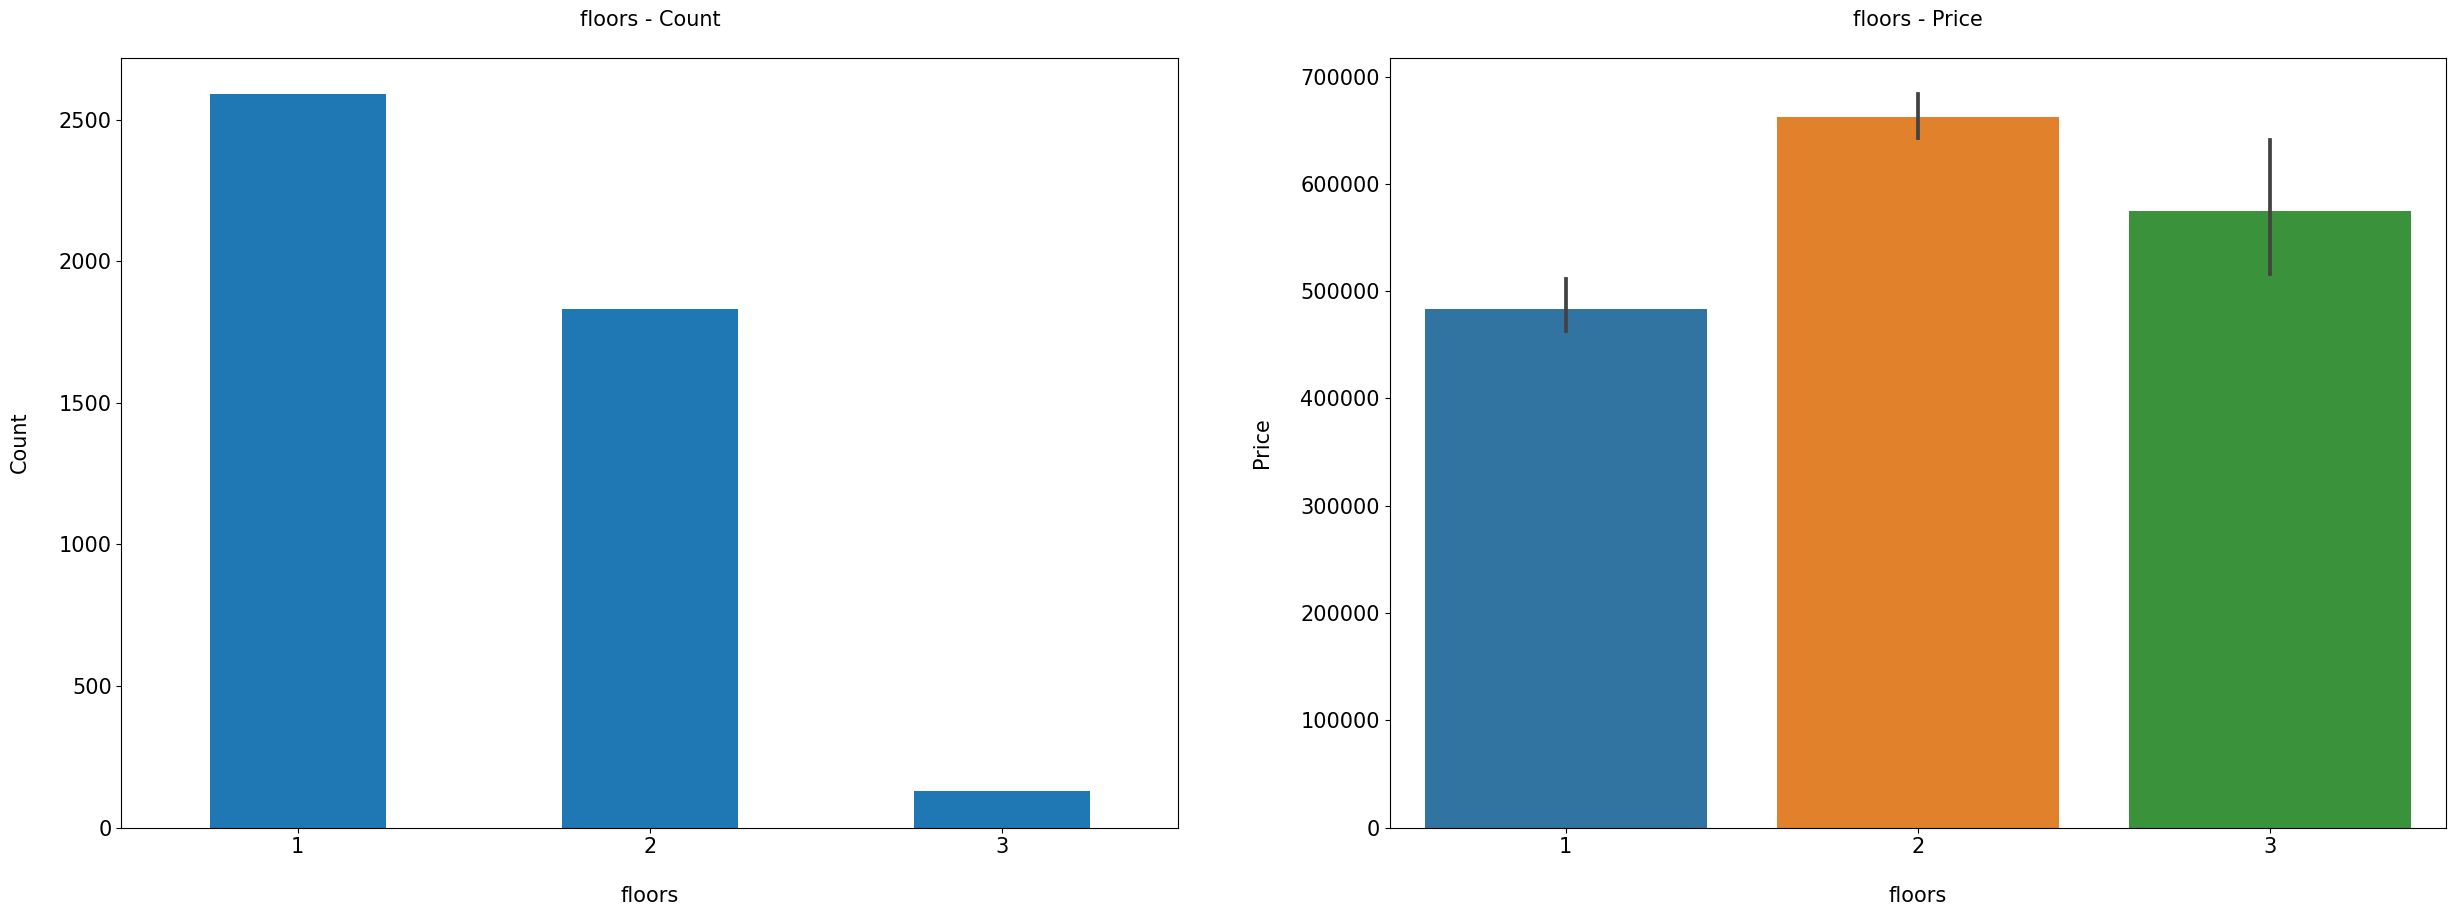

In [29]:
Categorical_Plot("floors")

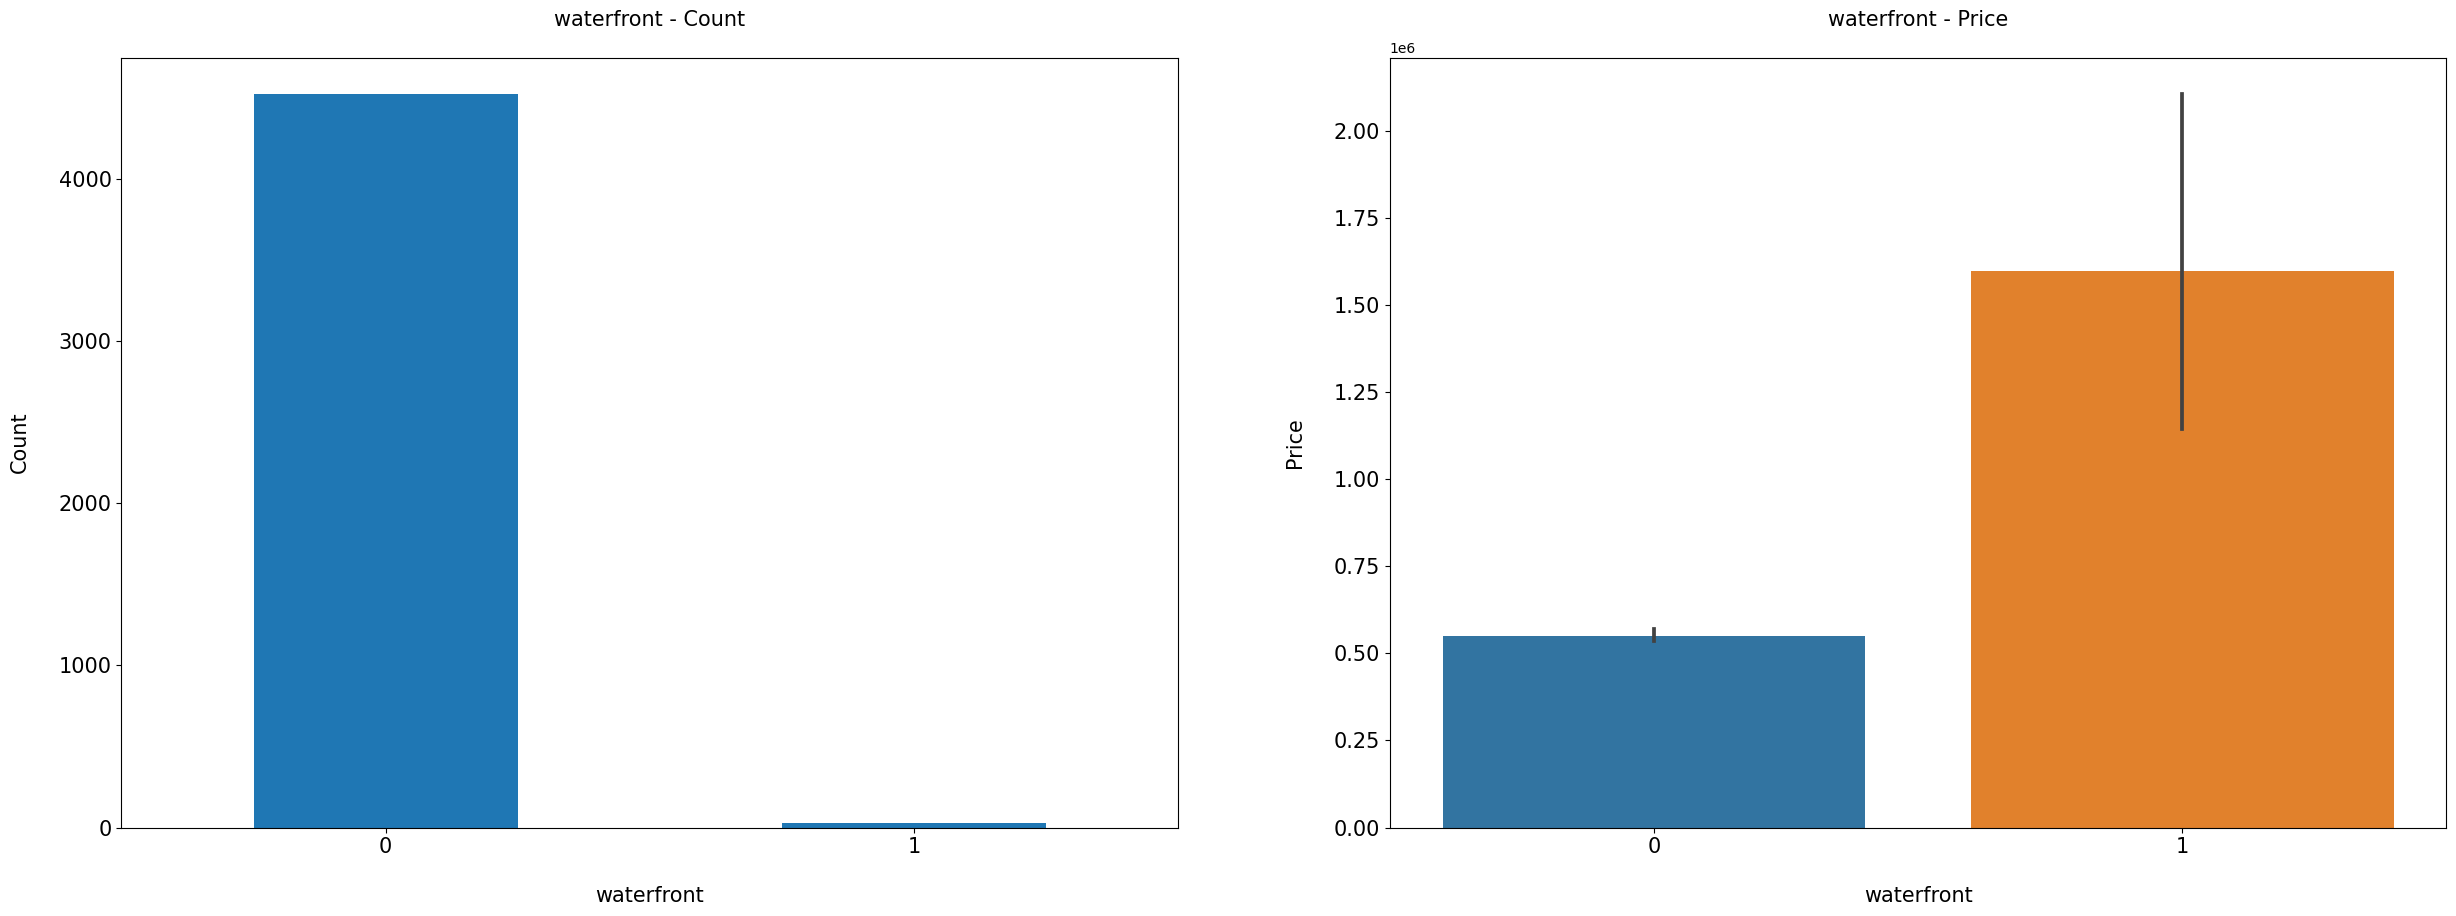

In [30]:
Categorical_Plot("waterfront")

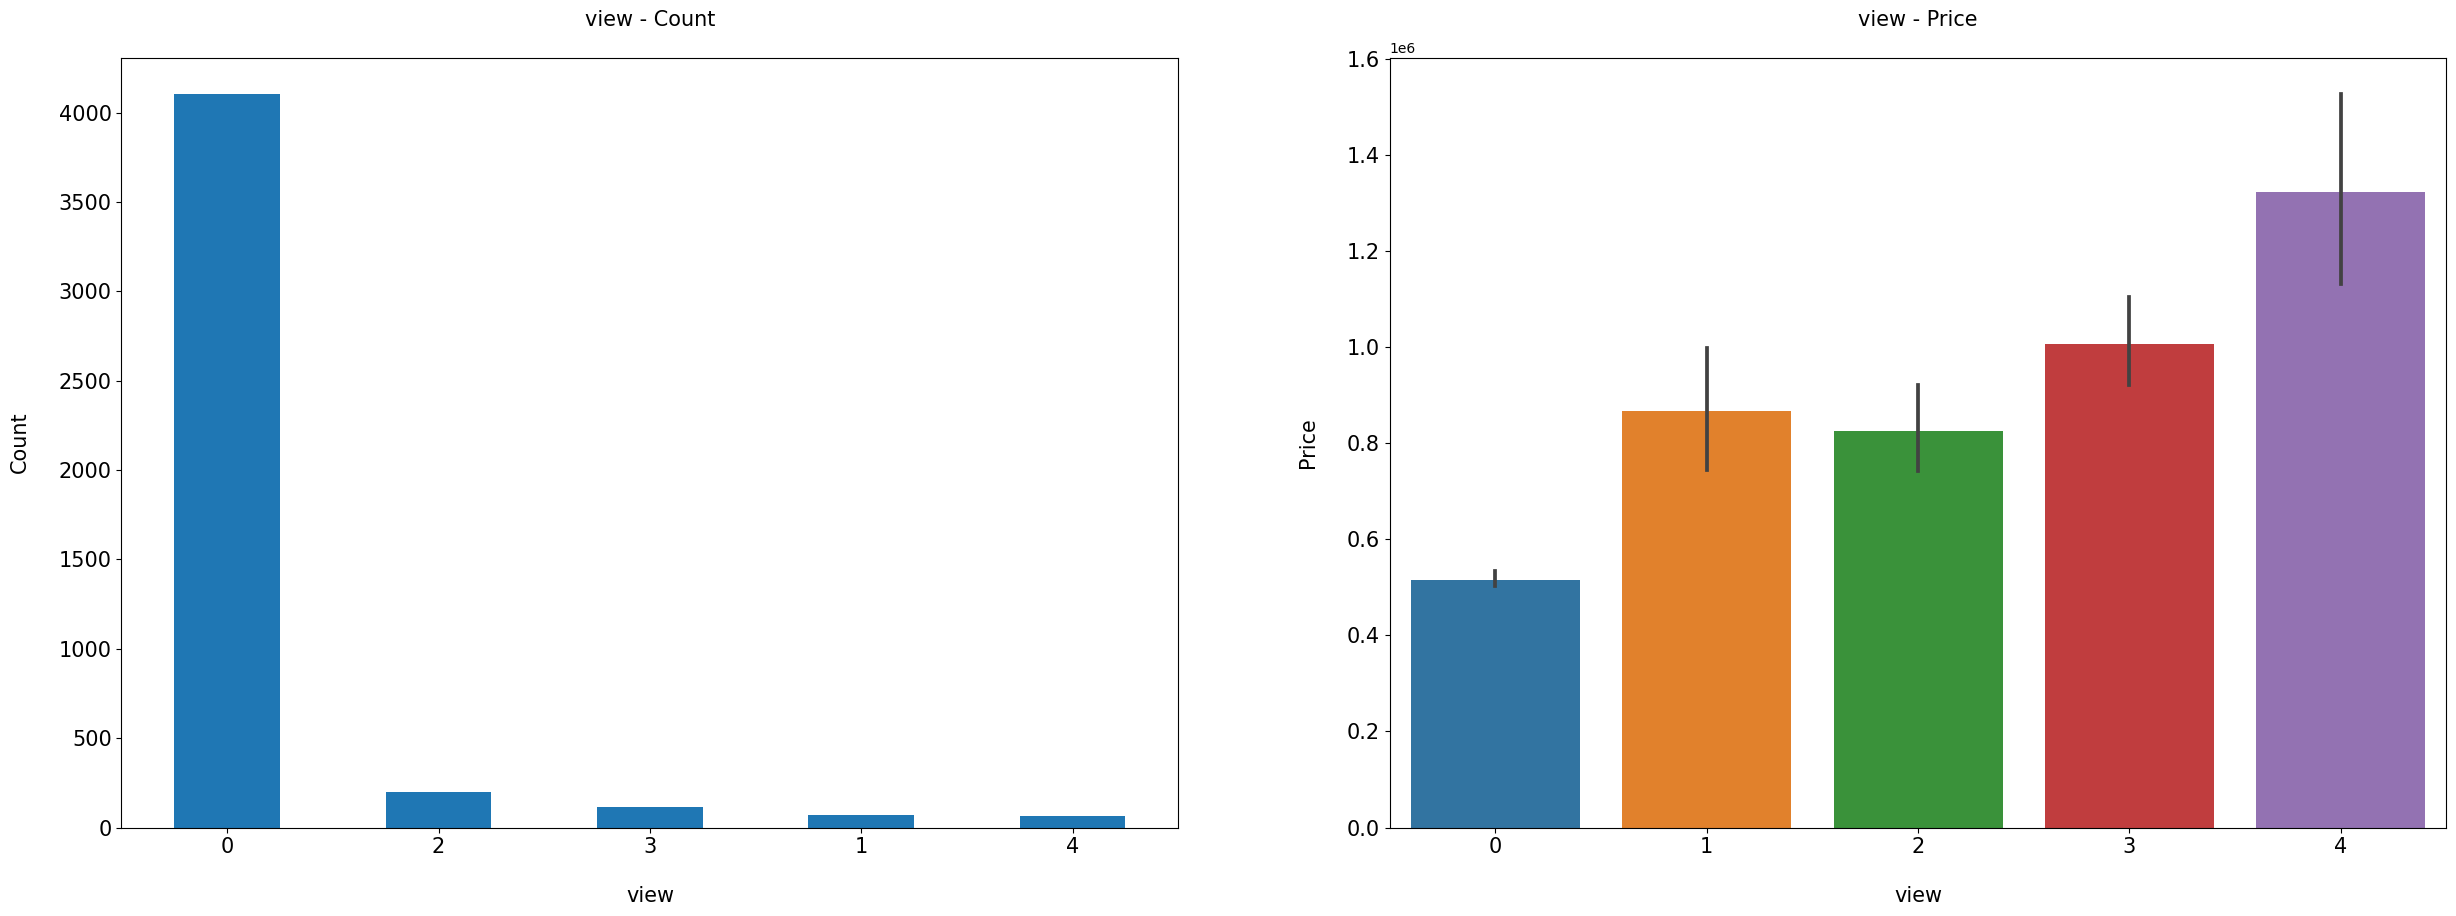

In [31]:
Categorical_Plot("view")

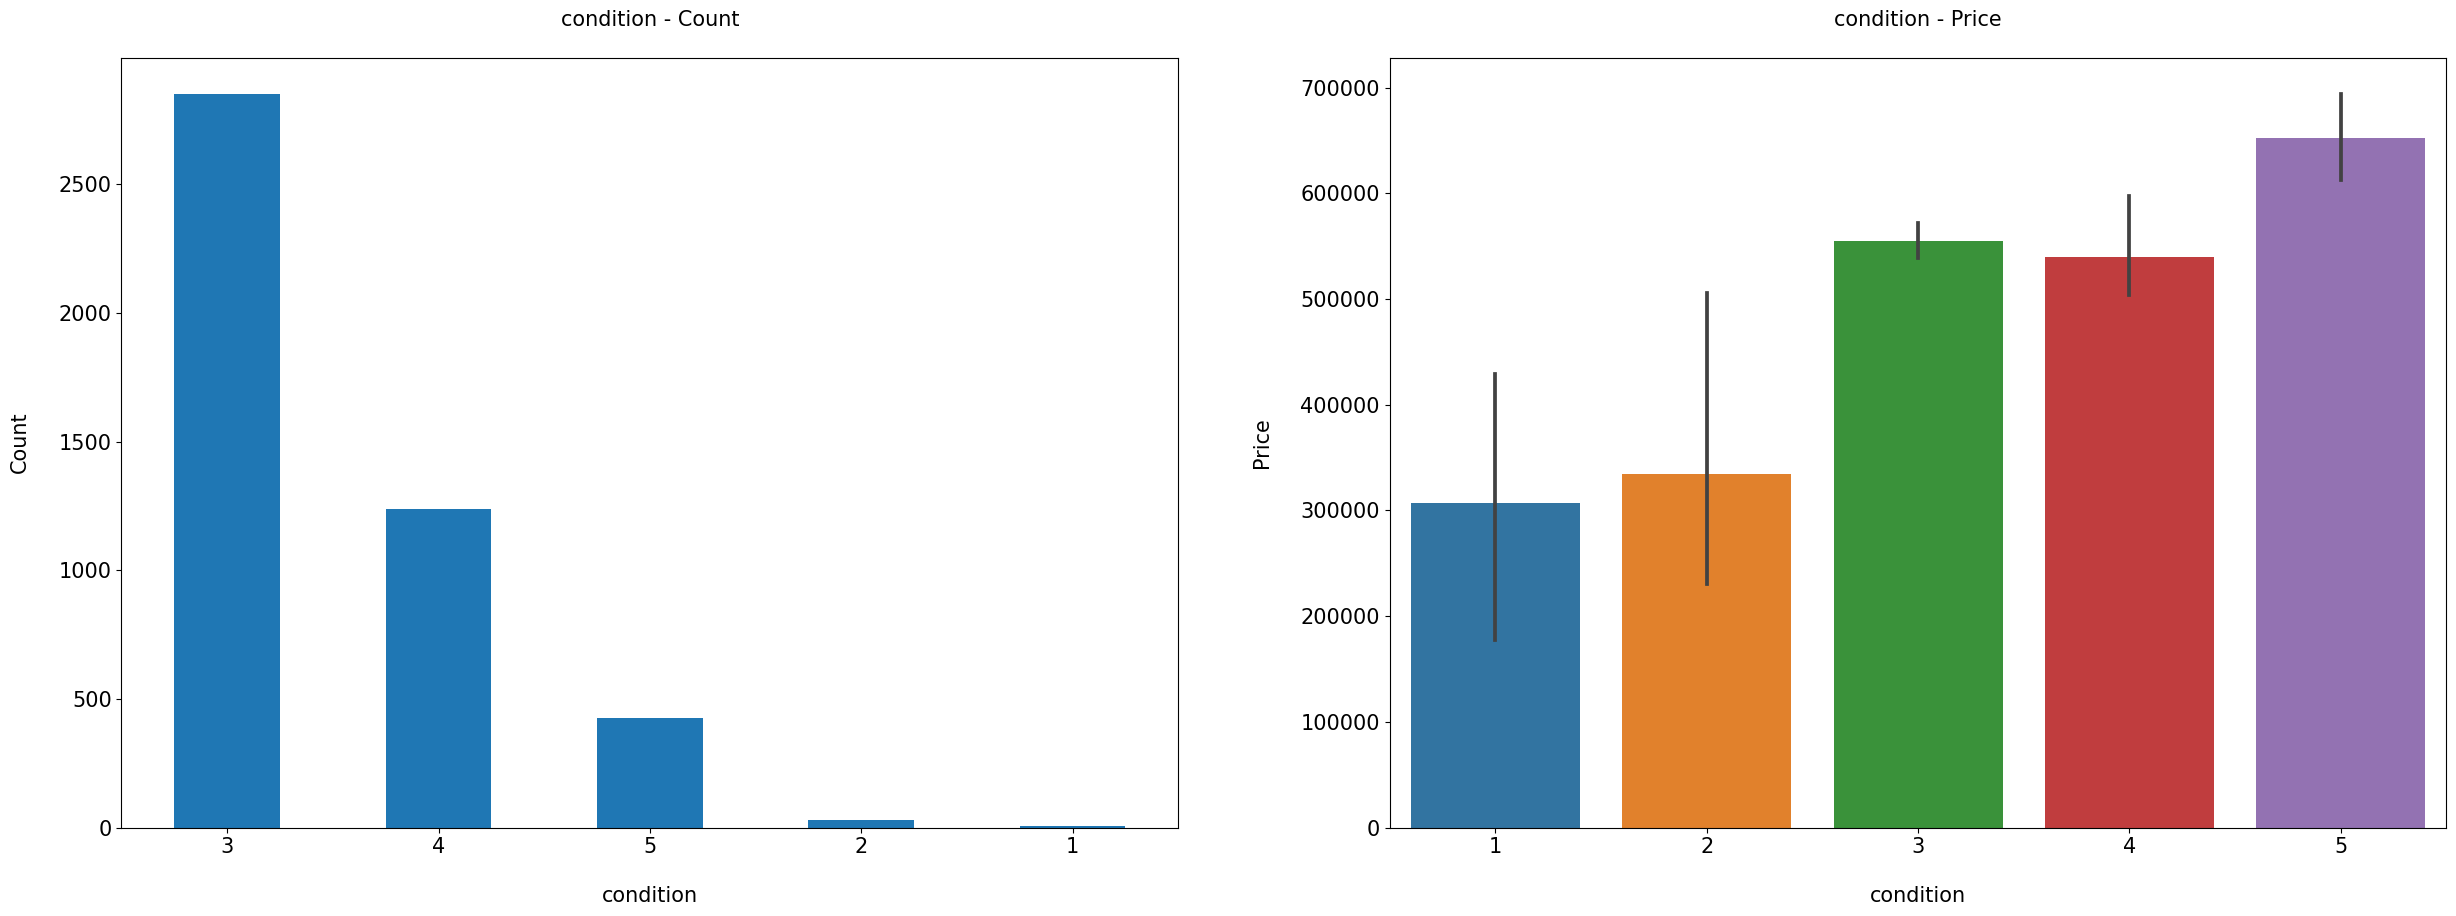

In [32]:
Categorical_Plot("condition")

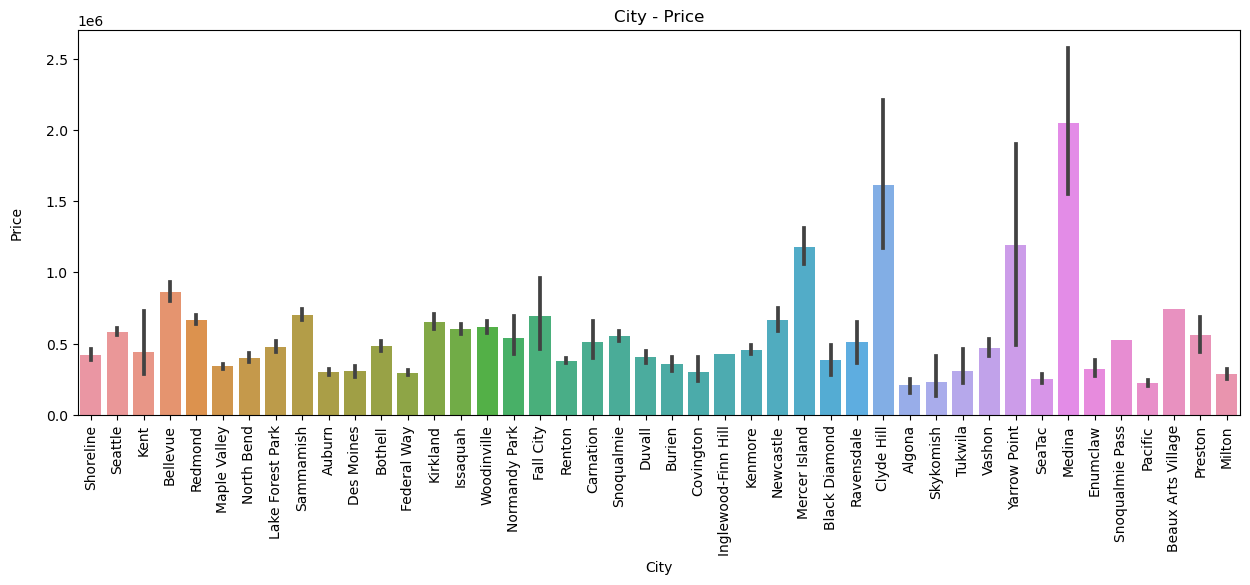

In [33]:
plt.figure(figsize=(15, 5))
sns.barplot(x = data['city'], y = data.price)
plt.xticks( horizontalalignment="center",rotation = 90 )
plt.xlabel("City")
plt.title("City - Price")
plt.ylabel("Price\n")
plt.show()

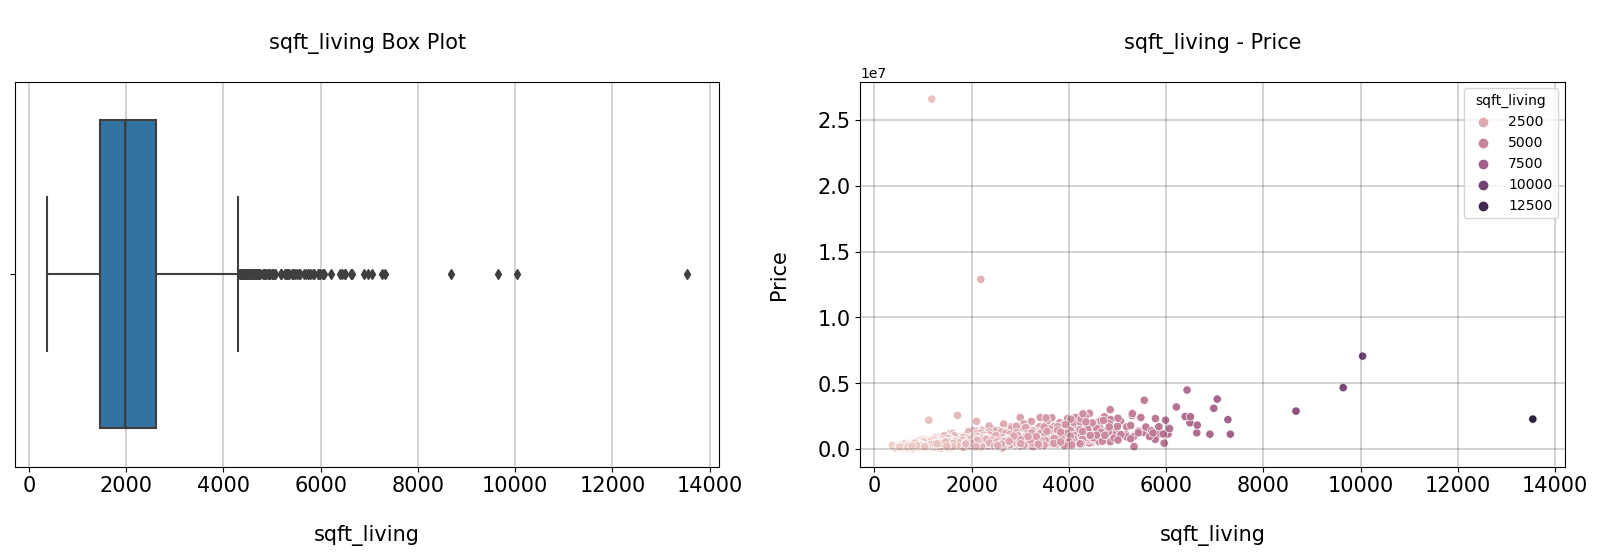

In [34]:
Numerical_Plot("sqft_living")

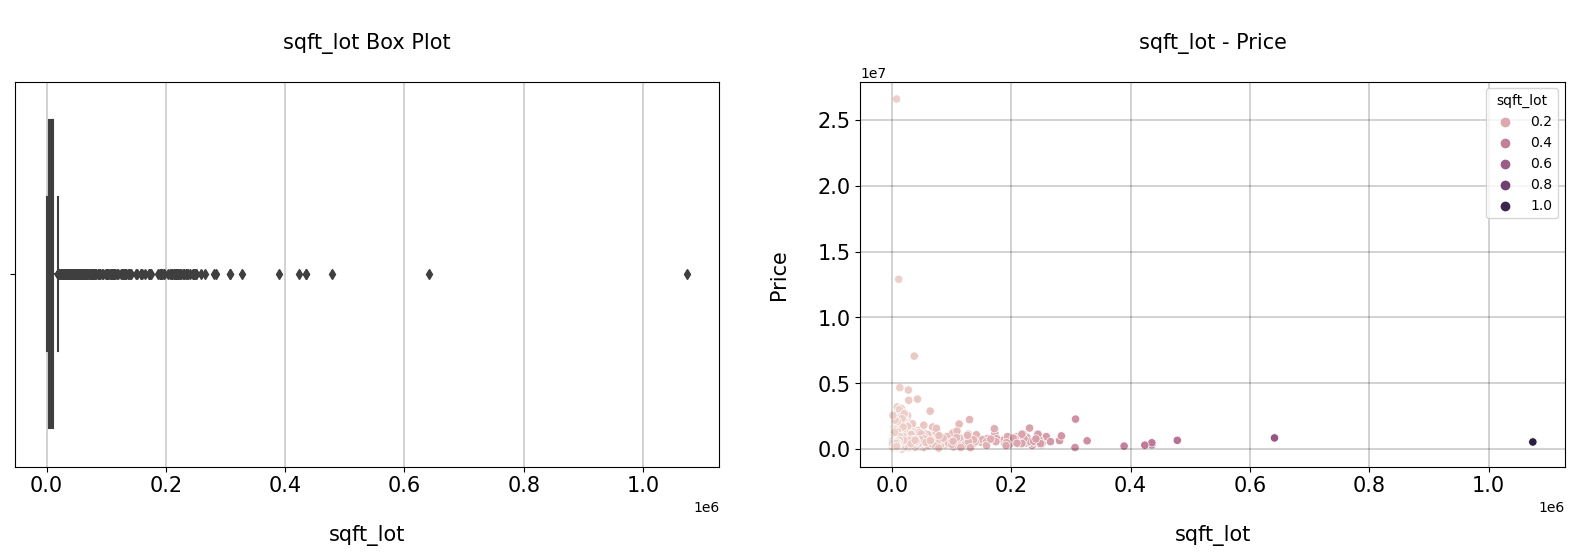

In [35]:
Numerical_Plot("sqft_lot")

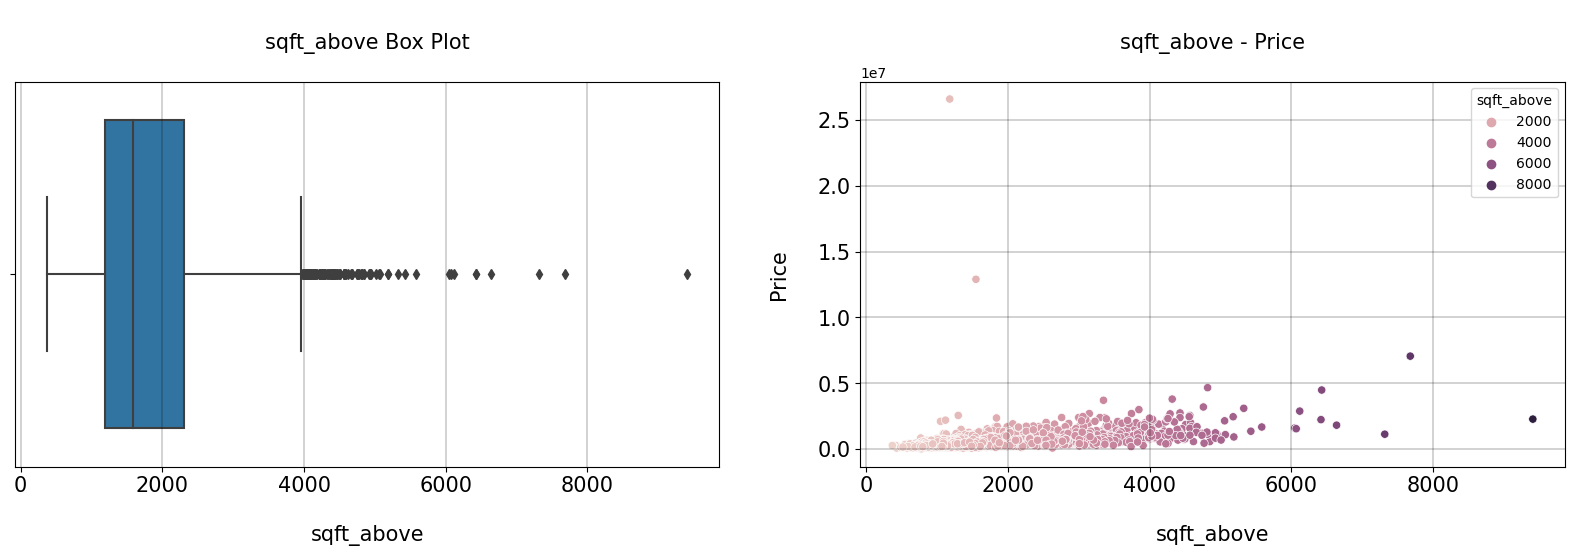

In [36]:
Numerical_Plot("sqft_above")

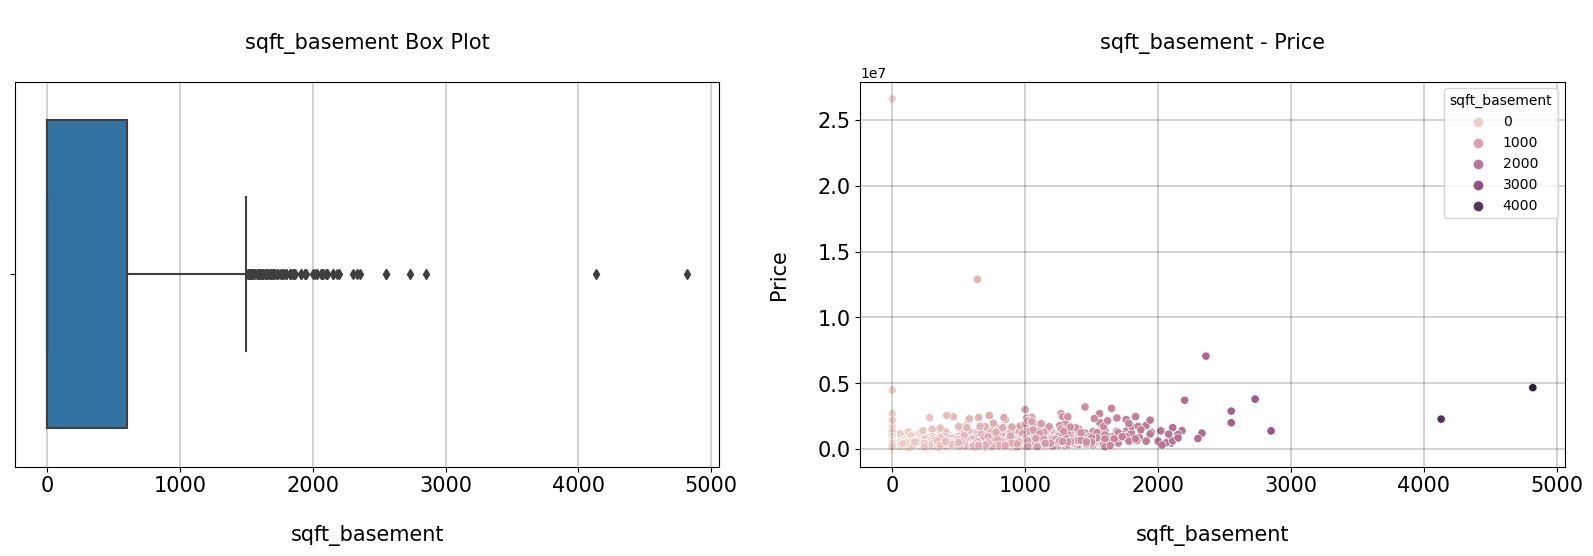

In [37]:
Numerical_Plot("sqft_basement")

<Figure size 1500x500 with 0 Axes>

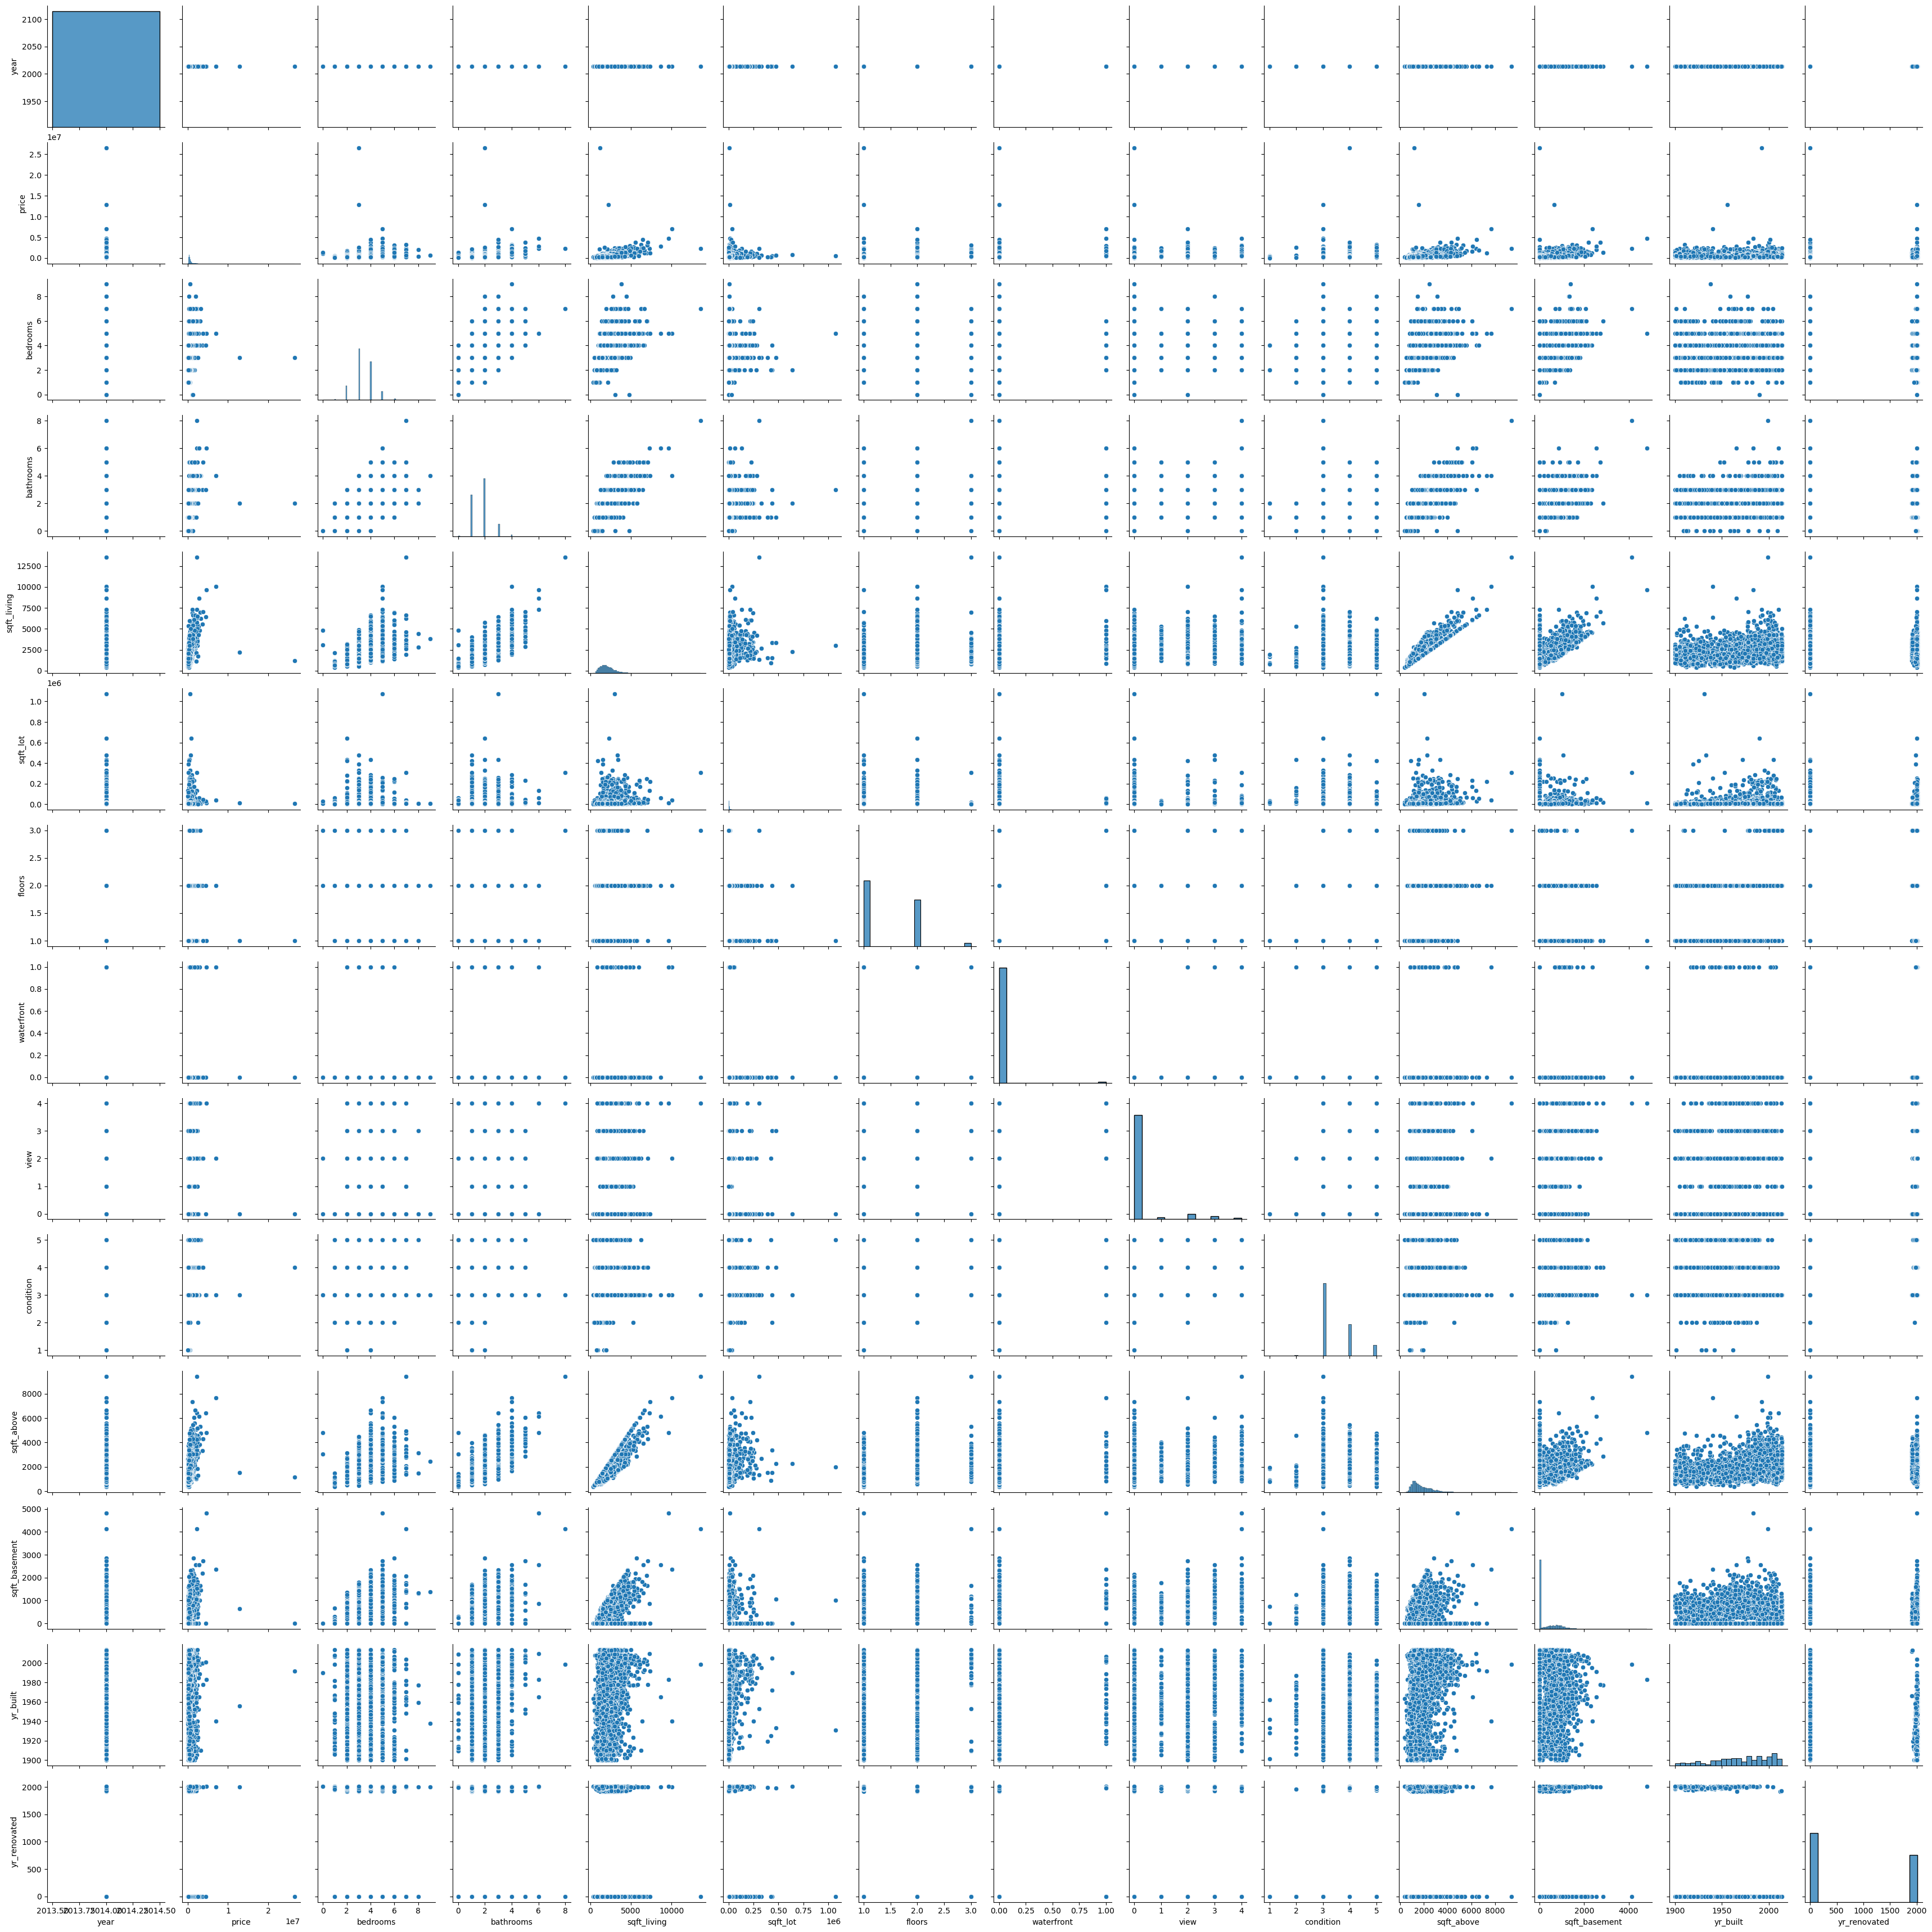

In [39]:
plt.figure(figsize=(15, 5))
sns.pairplot(data)
plt.show()

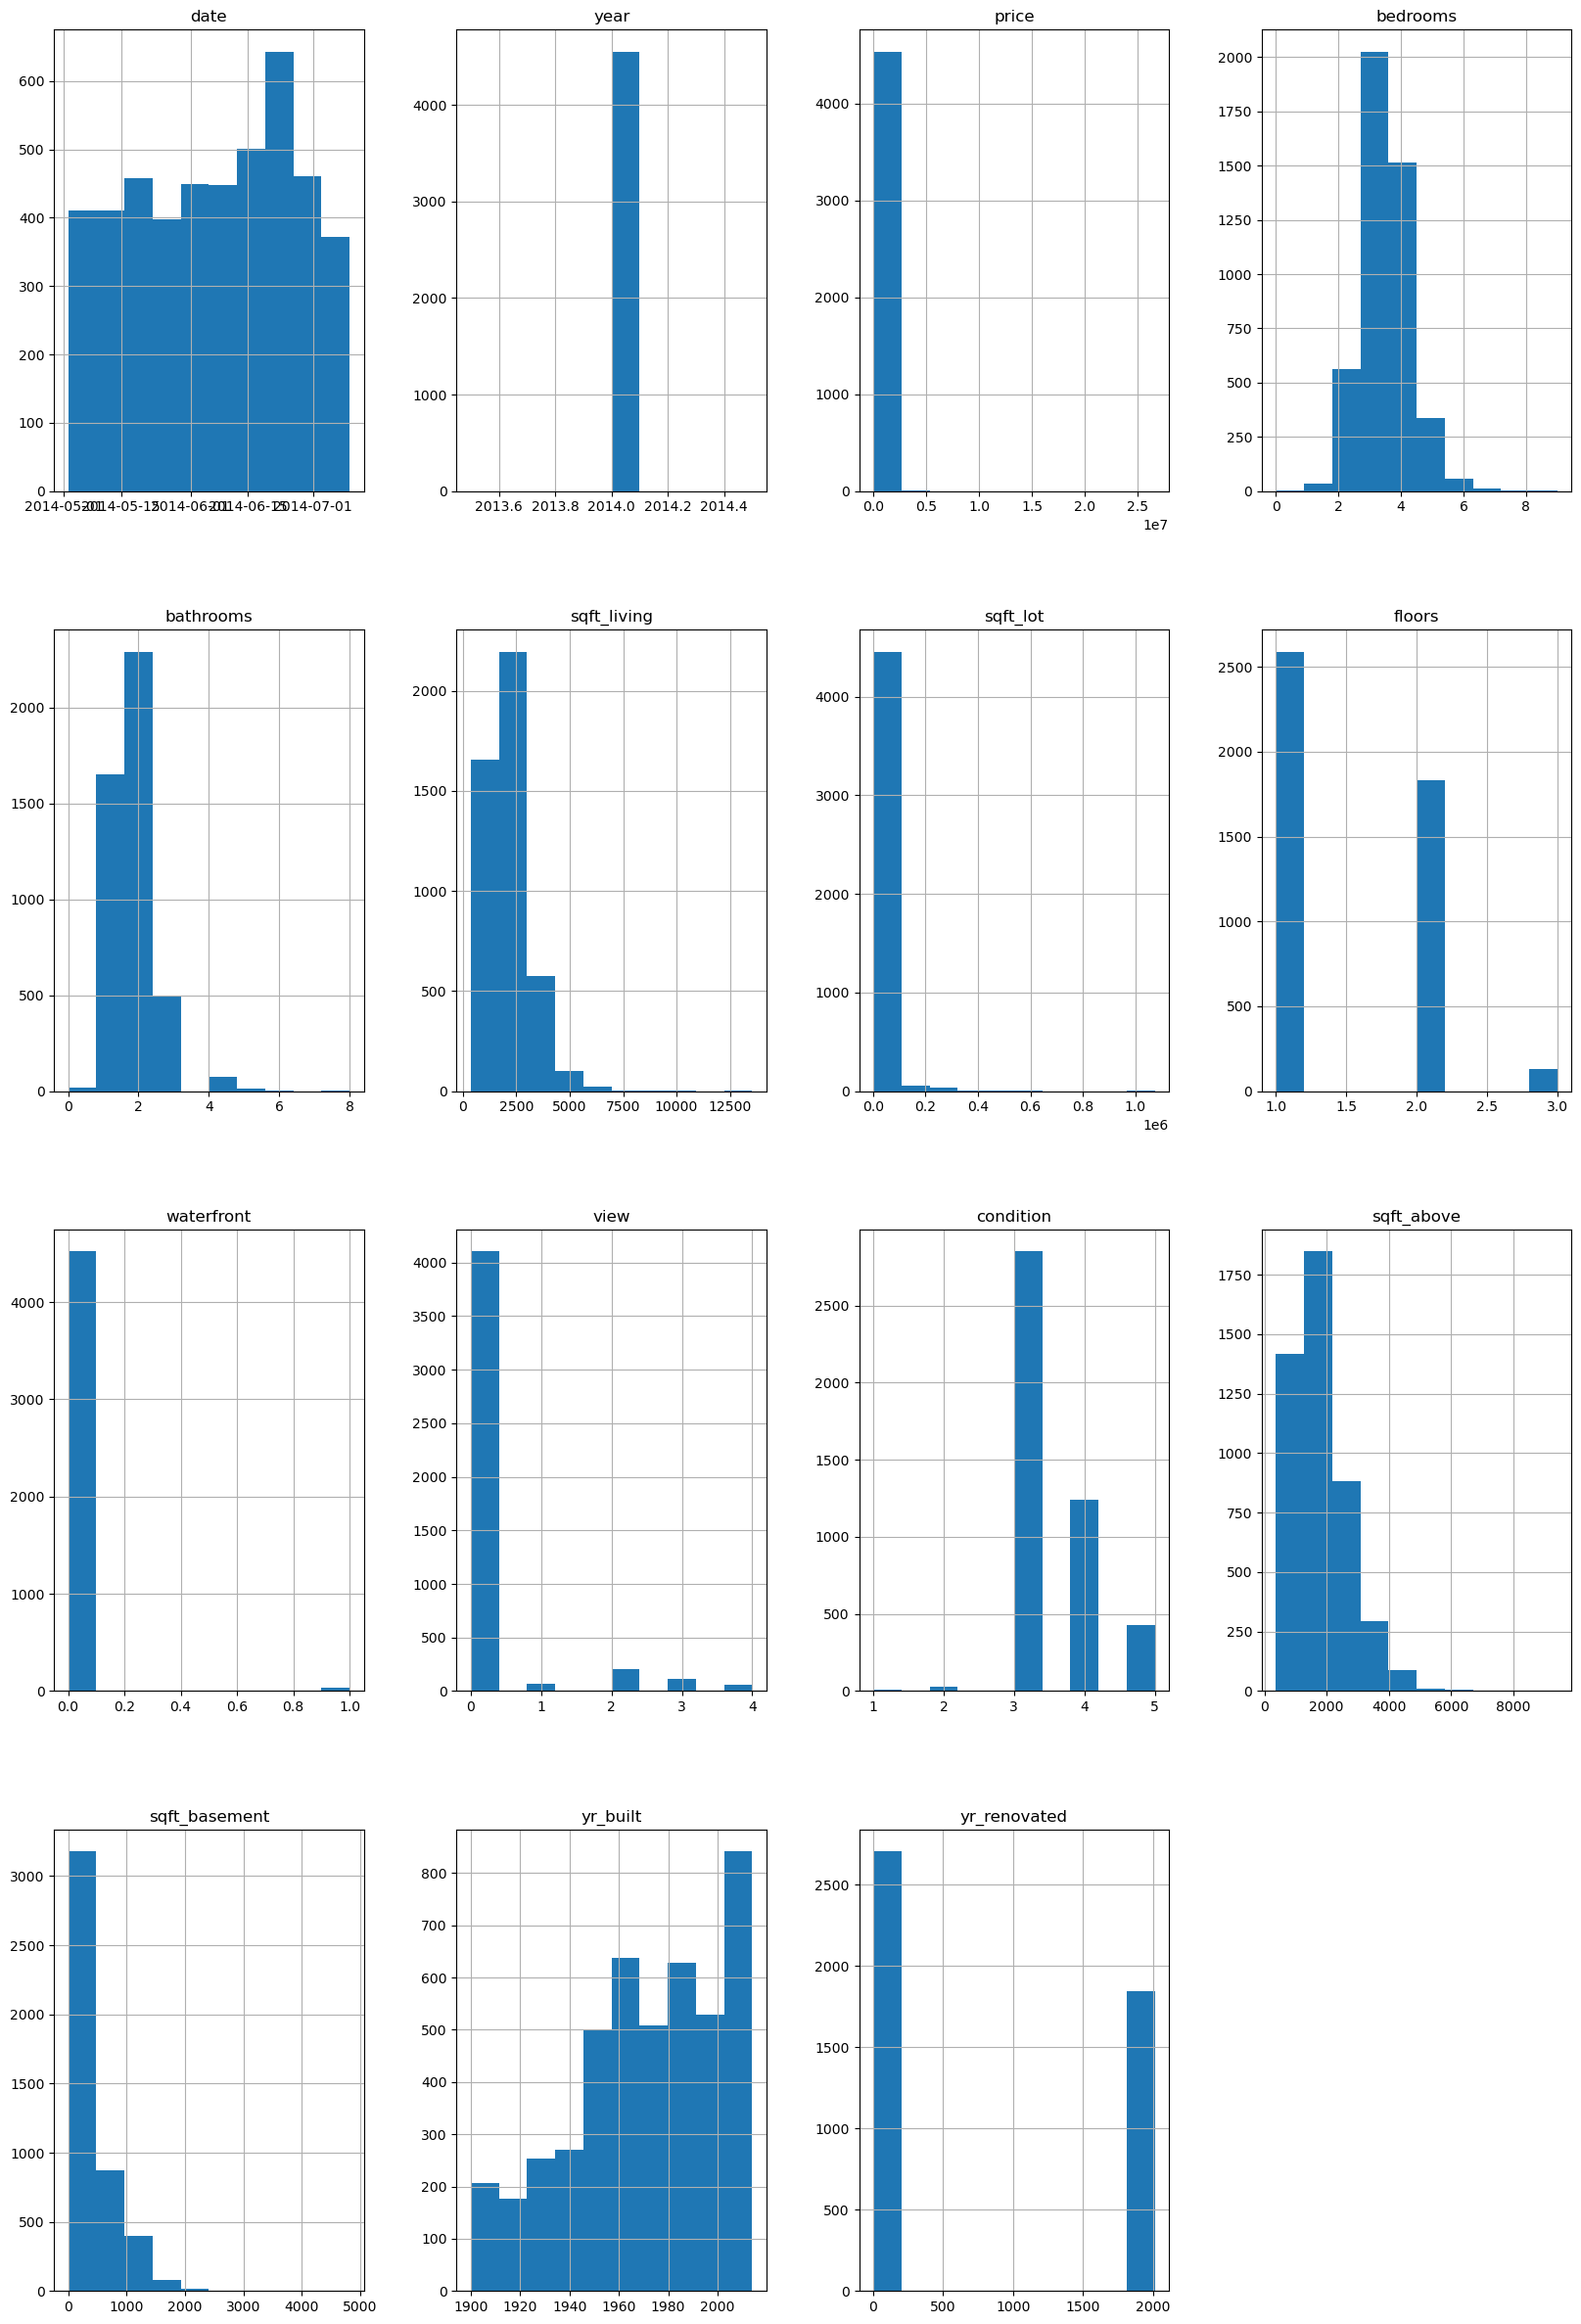

In [40]:
data.hist(figsize=(20,30));

# One Hot Encoding

In [41]:
house = pd.get_dummies(data, columns=['city'], prefix = ['city'])

In [42]:
house = house.drop(['date', 'street', 'statezip', 'country','sqft_above'], axis = 1)
house

,year,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,city_SeaTac,city_Seattle,city_Shoreline,city_Skykomish,city_Snoqualmie,city_Snoqualmie Pass,city_Tukwila,city_Vashon,city_Woodinville,city_Yarrow Point
0,2014,313000.0,3,1,1340,7912,1,0,0,3,...,0,0,1,0,0,0,0,0,0,0
1,2014,2384000.0,5,2,3650,9050,2,0,4,5,...,0,1,0,0,0,0,0,0,0,0
2,2014,342000.0,3,2,1930,11947,1,0,0,4,...,0,0,0,0,0,0,0,0,0,0
3,2014,420000.0,3,2,2000,8030,1,0,0,4,...,0,0,0,0,0,0,0,0,0,0
4,2014,550000.0,4,2,1940,10500,1,0,0,4,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,2014,308166.0,3,1,1510,6360,1,0,0,4,...,0,1,0,0,0,0,0,0,0,0
4596,2014,534333.0,3,2,1460,7573,2,0,0,3,...,0,0,0,0,0,0,0,0,0,0
4597,2014,416904.0,3,2,3010,7014,2,0,0,3,...,0,0,0,0,0,0,0,0,0,0
4598,2014,203400.0,4,2,2090,6630,1,0,0,3,...,0,1,0,0,0,0,0,0,0,0


# Normalize

In [43]:
columns = house.columns

In [44]:
scaler = preprocessing.MinMaxScaler(feature_range = (0, 1))
normal = pd.DataFrame(scaler.fit_transform(house), columns = columns)
normal.head(15)

,year,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,city_SeaTac,city_Seattle,city_Shoreline,city_Skykomish,city_Snoqualmie,city_Snoqualmie Pass,city_Tukwila,city_Vashon,city_Woodinville,city_Yarrow Point
0,0.0,0.011481,0.333333,0.125,0.073652,0.006775,0.0,0.0,0.0,0.50,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.089391,0.555556,0.250,0.249051,0.007835,0.5,0.0,1.0,1.00,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.012572,0.333333,0.250,0.118451,0.010534,0.0,0.0,0.0,0.75,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.015507,0.333333,0.250,0.123766,0.006885,0.0,0.0,0.0,0.75,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.020397,0.444444,0.250,0.119210,0.009186,0.0,0.0,0.0,0.75,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.018140,0.222222,0.125,0.038724,0.005348,0.0,0.0,0.0,0.50,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.012309,0.222222,0.250,0.074412,0.001790,0.0,0.0,0.0,0.50,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.017839,0.444444,0.250,0.177677,0.032815,0.5,0.0,0.0,0.50,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.016729,0.333333,0.250,0.156416,0.081771,0.0,0.0,0.0,0.75,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.023783,0.444444,0.250,0.087320,0.005181,0.0,0.0,0.0,0.50,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [45]:
house.shape

(4551, 57)

# Modeling the Data

In [46]:
x = normal.drop("price", axis=1)
y = pd.DataFrame(normal["price"])

In [47]:
nbrs = NearestNeighbors(n_neighbors=3).fit(x)
neigh_dist, neigh_ind = nbrs.kneighbors(x)
sort_neigh_dist = np.sort(neigh_dist, axis=0)

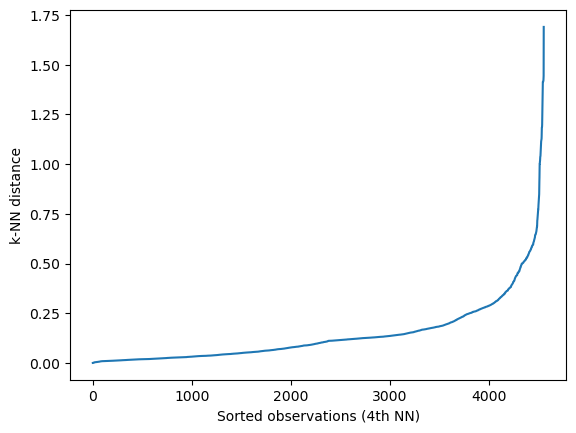

In [48]:
k_dist = sort_neigh_dist[:, 2]
plt.plot(k_dist)
plt.ylabel("k-NN distance")
plt.xlabel("Sorted observations (4th NN)")
plt.show()

In [51]:
clusters = DBSCAN(eps=0.9, min_samples=3).fit(x)
clusters.labels_

array([ 0,  1,  2, ..., 24,  1, 35], dtype=int64)

In [52]:
x["noise"] = clusters.labels_
y["noise"] = clusters.labels_

In [53]:
x = x[x.noise>-1]
y = y[y.noise>-1]
x.drop('noise', inplace = True, axis=1)
y.drop('noise', inplace = True, axis=1)

In [54]:
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size = 0.2, random_state =43 )

In [55]:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(3606, 56)
(3606, 1)
(902, 56)
(902, 1)


In [56]:
model = LinearRegression()
model.fit(X_train, Y_train)

Y_pred = model.predict(X_test)

In [57]:
model.intercept_

array([-2.20701001e+10])

In [58]:
model.coef_

array([[ 1.20460940e+06, -1.14225052e-02,  1.77731701e-02,
         1.18366609e-01, -5.27329006e-03, -1.85832762e-03,
         4.81959593e-03,  9.36191210e-03,  6.43822847e-03,
        -1.98675146e-02, -2.66855567e-03,  3.67669096e-04,
         2.20701001e+10,  2.20701001e+10, -2.78213920e+10,
         2.20701001e+10,  2.20701001e+10,  2.20701001e+10,
         2.20701001e+10,  2.20701001e+10,  2.20701001e+10,
         2.20701001e+10,  2.20701001e+10,  2.20701001e+10,
         2.20701001e+10,  2.20701001e+10,  2.20701001e+10,
        -1.19222368e+08,  2.20701001e+10,  2.20701001e+10,
         2.20701001e+10,  2.20701001e+10,  2.20701001e+10,
         2.20701001e+10,  2.20701001e+10,  2.20701001e+10,
        -6.49437372e+06,  2.20701001e+10,  2.20701001e+10,
         2.20701001e+10,  2.20701001e+10,  6.65376698e+04,
         2.20701001e+10,  2.20701001e+10,  2.20701001e+10,
         2.20701001e+10,  2.20701001e+10,  2.20701001e+10,
         2.20701001e+10,  0.00000000e+00,  2.20701001e+1

In [59]:
# Evalutions

# MAE
print("Mean Absolute Error     : ", metrics.mean_absolute_error(Y_test, Y_pred))

# MSE
print("Mean Squared Error      : ", metrics.mean_squared_error(Y_test, Y_pred))

# RMSE
print("Root Mean Squared Error : ", np.sqrt(metrics.mean_squared_error(Y_test, Y_pred)))

#R2 Score
print("R2 Score                : ", metrics.r2_score(Y_test, Y_pred))

Mean Absolute Error     :  0.004347839906687197
Mean Squared Error      :  4.0030763436182234e-05
Root Mean Squared Error :  0.006326986916074842
R2 Score                :  0.7634527127616095


# Creating Models using different algorithms

In [61]:
## 1. Creating a  Linear Regression Model
from sklearn.linear_model import LinearRegression

LR = LinearRegression()
LR.fit(X_train, Y_train)
Y_pred1 = LR.predict(X_test)

## 2. Creating a Random Forest Model
from sklearn.ensemble import RandomForestRegressor

RF = RandomForestRegressor()
RF.fit(X_train, Y_train)
Y_pred2 = RF.predict(X_test)

## 3. Creating a Gradient Boosting Model
from sklearn.ensemble import GradientBoostingRegressor

GB = GradientBoostingRegressor()
GB.fit(X_train, Y_train)
Y_pred3 = GB.predict(X_test)

## 4. Creating a SVR Model
from sklearn.svm import SVR

svr = SVR()
svr.fit(X_train, Y_train)
Y_pred4 = svr.predict(X_test)

## 5. Creating a Decision Tree Regressor Model
from sklearn.tree import DecisionTreeRegressor

DT = DecisionTreeRegressor()
DT.fit(X_train, Y_train)
Y_pred5 = DT.predict(X_test)


# Evaluation Metrics


-R2 Score

-Root Mean Squared Error (RMSE)

-Mean Squared Error (MSE)

In [62]:
## Checking Model accuracy
from sklearn.metrics import r2_score, mean_squared_error

r2_score1 = r2_score(Y_test, Y_pred1)
r2_score2 = r2_score(Y_test, Y_pred2)
r2_score3 = r2_score(Y_test, Y_pred3)
r2_score4 = r2_score(Y_test, Y_pred4)
r2_score5 = r2_score(Y_test, Y_pred5)

mse1 = mean_squared_error(Y_test, Y_pred1)
mse2 = mean_squared_error(Y_test, Y_pred2)
mse3 = mean_squared_error(Y_test, Y_pred3)
mse4 = mean_squared_error(Y_test, Y_pred4)
mse5 = mean_squared_error(Y_test, Y_pred5)

rmse1 = np.sqrt(mse1)
rmse2 = np.sqrt(mse2)
rmse3 = np.sqrt(mse3)
rmse4 = np.sqrt(mse4)
rmse5 = np.sqrt(mse5)


print("Linear Regression R2 Score :", r2_score1)
print("Linear Regression MSE :", mse1)
print("Linear Regression RMSE :", rmse1)
print("Random Forest R2 Score :", r2_score2)
print("Random Forest MSE :", mse2)
print("Random Forest RMSE :", rmse2)
print("Gradient Boosting R2 Score :", r2_score3)
print("Gradient Boosting MSE :", mse3)
print("Gradient Boosting RMSE :", rmse3)
print("SVR R2 Score :", r2_score4)
print("SVR MSE :", mse4)
print("SVR RMSE :", rmse4)
print("Decision Tree R2 Score :", r2_score5)
print("Decision Tree MSE :", mse5)
print("Decision Tree RMSE :", rmse5)


Linear Regression R2 Score : 0.7634527127616095
Linear Regression MSE : 4.0030763436182234e-05
Linear Regression RMSE : 0.006326986916074842
Random Forest R2 Score : 0.5312234067326218
Random Forest MSE : 7.933079735805263e-05
Random Forest RMSE : 0.008906783783052817
Gradient Boosting R2 Score : 0.721104096904388
Gradient Boosting MSE : 4.719739571094483e-05
Gradient Boosting RMSE : 0.006870036077848851
SVR R2 Score : -40.54399044732062
SVR MSE : 0.007030465972394389
SVR RMSE : 0.08384787398851797
Decision Tree R2 Score : -2.40471615231361
Decision Tree MSE : 0.0005761781859846876
Decision Tree RMSE : 0.024003711920965214


In [63]:
## Checking only scores of the models
print(LR.score(X_test,Y_test),": Linear Regression")
print(RF.score(X_test,Y_test),": Random Forest")
print(GB.score(X_test,Y_test),": Gradient Boosting")
print(svr.score(X_test,Y_test),": SVR")
print(DT.score(X_test,Y_test),": Decision Tree")

0.7634527127616095 : Linear Regression
0.5312234067326218 : Random Forest
0.721104096904388 : Gradient Boosting
-40.54399044732062 : SVR
-2.40471615231361 : Decision Tree


# Model Comparison

In [64]:
## Creating dataframe for Models with scores
final_data = pd.DataFrame({'Models':['Linear Regression', 'Random Forest Regressor', 
                'Gradient Boosting Regressor', 'SVR', 'DecisionTreeRegressor'], 
                        'R2_Score': [r2_score1, r2_score2, r2_score3, r2_score4, r2_score5 ]})

models_df = pd.DataFrame(final_data)

# Sort the DataFrame based on R2_Score in descending order
models_df_sorted = models_df.sort_values(by='R2_Score', ascending=False)

# Apply background gradient to the R2_Score column
models_df_sorted_styled = models_df_sorted.style.background_gradient(subset=['R2_Score'], cmap='Blues')
models_df_sorted_styled

,Models,R2_Score
0,Linear Regression,0.763453
2,Gradient Boosting Regressor,0.721104
1,Random Forest Regressor,0.531223
4,DecisionTreeRegressor,-2.404716
3,SVR,-40.543990


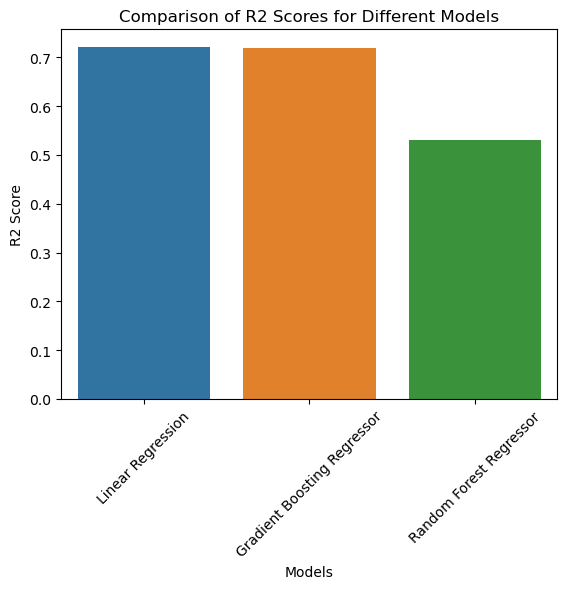

In [65]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define the model names and corresponding R2 scores
model_names = ['Random Forest Regressor', 'Gradient Boosting Regressor',  'Linear Regression']
r2_scores = [0.531223, 0.719256, 0.721104, 0.763453]

# Sort the model names and R2 scores based on R2 scores in descending order
sorted_scores, sorted_names = zip(*sorted(zip(r2_scores, model_names), reverse=True))

# Create a bar plot using Seaborn
sns.barplot(x=list(sorted_names), y=list(sorted_scores))
plt.xlabel('Models')
plt.ylabel('R2 Score')
plt.title('Comparison of R2 Scores for Different Models')
plt.xticks(rotation=45)
plt.show()


# Conclusion

**The R2 scores for house price prediction provide insights into the performance of different models. The Linear Regression and  Gradient Boosting Regressor models have high scores, indicating they are good at predicting house prices.However, the Random Forest Regressor has a lower score, suggesting it may not be as accurate. The DecisionTreeRegressor and SVR models perform poorly with negative scores. It is recommended to use the models with high scores for reliable house price predictions. Further evaluation is needed to ensure their effectiveness in real-world situations.**

# Model Deployment

In [66]:
import pickle 
pickle.dump(LR,open("model.pkl", 'wb'))